<a href="https://colab.research.google.com/github/DBroad779/MedicalPrediction2025/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries
* pydoc is for using SQLite in Python
* Pandas, matlab, and numpy are used for the data cleaning

In [ ]:
import pydoc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Loading the data sets. These can be found on Kaggle. The file name is KaggleV2-May-2016.csv

In [ ]:
#Importing Dataset & Making a Copy
project1 = pd.read_csv('KaggleV2-May-2016.csv')
project_copy = project1.copy()

In [ ]:
#Importing City/State CSV file
city_state = pd.read_csv ("Brazil's City_State spreadsheet - Sheet1.csv")
city_copy = city_state.copy()

In [ ]:
#Checking first five elements
city_copy.head()

,Neighbourhood,City,State
0,jardim da penha,Vitória,Espirito Santo
1,mata da praia,Vitória,Espirito Santo
2,pontal de camburi,Vitória,Espirito Santo
3,república,Vitória,Espirito Santo
4,goiabeiras,Vitória,Espirito Santo


Viewing and Cleaning the data

In [ ]:
#Getting info on data set just to make sure import has correct info
city_copy.info()#Getting dataset info like dtype

city_copy.describe()#Checking description of dataset

city_copy.isnull().sum() #Checking to see if there are any missingness

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Neighbourhood  81 non-null     object
 1   City           81 non-null     object
 2   State          81 non-null     object
dtypes: object(3)
memory usage: 2.0+ KB


,0
Neighbourhood,0
City,0
State,0


In [ ]:
project_copy.head()
project_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PatientId                  110527 non-null  float64
 1   AppointmentID              110527 non-null  int64  
 2   Gender                     110527 non-null  object 
 3   ScheduledDay               110527 non-null  object 
 4   AppointmentDay             110527 non-null  object 
 5   Age                        110527 non-null  int64  
 6   Neighbourhood              110527 non-null  object 
 7   Scholarship                110527 non-null  int64  
 8   Hipertension               110527 non-null  int64  
 9   Diabetes                   110527 non-null  int64  
 10  Alcoholism                 110527 non-null  int64  
 11  Handcap                    110527 non-null  int64  
 12  SMS_received               110527 non-null  int64  
 13  No-show                    11

In [ ]:
#Always Convert to datetime
project_copy['ScheduledDay'] = pd.to_datetime(project_copy['ScheduledDay'])
project_copy['AppointmentDay'] = pd.to_datetime(project_copy['AppointmentDay'])

# Normalizing to set time as 00:00:00 - Avoiding - Days in Advance
project_copy['ScheduledDay'] = project_copy['ScheduledDay'].dt.normalize()
project_copy['AppointmentDay'] = project_copy['AppointmentDay'].dt.normalize()

#Creating Weekday Variable from Appointment Day
project_copy['WeekDay_Appointment'] = project_copy['AppointmentDay'].dt.isocalendar().day

project_copy['ScheduledDOW'] = project_copy['ScheduledDay'].dt.day_name() #Gets the day appt was scheduled

project_copy['AppointmentDOW'] = project_copy['AppointmentDay'].dt.day_name() #Gets the day appt was scheduled


#Appointment Days from Scheduled Days
project_copy['Days_In_Advanced'] = (project_copy['AppointmentDay'] - project_copy['ScheduledDay']).dt.days

#Changing ScheduledDay and AppointmentDay to onlyu yyyy/mm/dd (Getting rid of time)
project_copy['ScheduledDay'] = pd.to_datetime(project_copy['ScheduledDay']).dt.date
project_copy['AppointmentDay'] = pd.to_datetime(project_copy['AppointmentDay']).dt.date

#Making sure the code ran correctly
project_copy.head()
project_copy

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Zip Code,Quality of Transportation,WeekDay_Appointment,ScheduledDOW,AppointmentDOW,Days_In_Advanced
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,NaN,NaN,5,Friday,Friday,0
1,5.589980e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,NaN,NaN,5,Friday,Friday,0
2,4.262960e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,NaN,NaN,5,Friday,Friday,0
3,8.679510e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,NaN,NaN,5,Friday,Friday,0
4,8.841190e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,NaN,NaN,5,Friday,Friday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,NaN,NaN,2,Tuesday,Tuesday,35
110523,3.596270e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,NaN,NaN,2,Tuesday,Tuesday,35
110524,1.557660e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,NaN,NaN,2,Wednesday,Tuesday,41
110525,9.213490e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,NaN,NaN,2,Wednesday,Tuesday,41


In [ ]:
#Checking for if Scheduled or Appointment Dates Make Sense
invalid_dates = project_copy[project_copy['AppointmentDay'] < project_copy['ScheduledDay']]
print(invalid_dates)

#Since it is only 5 rows affected, we will delete them
project_copy = project_copy[project_copy['AppointmentDay'] >= project_copy['ScheduledDay']]

          PatientId  AppointmentID Gender ScheduledDay AppointmentDay  Age  \
27033  7.839270e+12        5679978      M   2016-05-10     2016-05-09   38   
55226  7.896290e+12        5715660      F   2016-05-18     2016-05-17   19   
64175  2.425230e+13        5664962      F   2016-05-05     2016-05-04   22   
71533  9.982320e+14        5686628      F   2016-05-11     2016-05-05   81   
72362  3.787480e+12        5655637      M   2016-05-04     2016-05-03    7   

       Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
27033    RESISTÊNCIA            0             0         0           0   
55226  SANTO ANTÔNIO            0             0         0           0   
64175     CONSOLAÇÃO            0             0         0           0   
71533  SANTO ANTÔNIO            0             0         0           0   
72362     TABUAZEIRO            0             0         0           0   

       Handcap  SMS_received No-show  Zip Code  Quality of Transportation  \
27033        1 

In [ ]:
#Deleting Quality_transportation for project_copy
del project_copy['Quality of Transportation']

In [ ]:
print(f"Number of invalid date rows: {len(invalid_dates)}")
print(f"Percentage: {len(invalid_dates)/len(project_copy)*100:.4f}%")

Number of invalid date rows: 5
Percentage: 0.0045%


In [ ]:
#Checking for Duplicate IDs
project_copy['AppointmentID'].duplicated().sum()

#PatientId has Duplicates Due to Patients Revisiting Clinic

np.int64(0)

In [ ]:
#Correcting Column Names
project_copy.columns

project_copy.rename(columns={'Hipertension': 'Hypertension', 'Handcap':'Handicap', 'No-show':'No_show', 'Zip Code': 'Zip_code', 'Quality of Transportation': 'Quality_transportation'}, inplace=True)



/tmp/ipython-input-12-1872670963.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  project_copy.rename(columns={'Hipertension': 'Hypertension', 'Handcap':'Handicap', 'No-show':'No_show', 'Zip Code': 'Zip_code', 'Quality of Transportation': 'Quality_transportation'}, inplace=True)


In [ ]:
#Checking Uniqueness in Categorical Variables
project_copy['Neighbourhood'].unique()

project_copy['Neighbourhood'] = project_copy['Neighbourhood'].str.lower().str.strip()
project_copy['Neighbourhood'].unique()

/tmp/ipython-input-13-3661851377.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  project_copy['Neighbourhood'] = project_copy['Neighbourhood'].str.lower().str.strip()


array(['jardim da penha', 'mata da praia', 'pontal de camburi',
       'república', 'goiabeiras', 'andorinhas', 'conquista',
       'nova palestina', 'da penha', 'tabuazeiro', 'bento ferreira',
       'são pedro', 'santa martha', 'são cristóvão', 'maruípe',
       'grande vitória', 'são benedito', 'ilha das caieiras',
       'santo andré', 'solon borges', 'bonfim', 'jardim camburi',
       'maria ortiz', 'jabour', 'antônio honório', 'resistência',
       'ilha de santa maria', 'jucutuquara', 'monte belo',
       'mário cypreste', 'santo antônio', 'bela vista', 'praia do suá',
       'santa helena', 'itararé', 'inhanguetá', 'universitário',
       'são josé', 'redenção', 'santa clara', 'centro', 'parque moscoso',
       'do moscoso', 'santos dumont', 'caratoíra', 'ariovaldo favalessa',
       'ilha do frade', 'gurigica', 'joana d´arc', 'consolação',
       'praia do canto', 'boa vista', 'morada de camburi', 'santa luíza',
       'santa lúcia', 'barro vermelho', 'estrelinha', 'forte são 

In [ ]:
#Eliminating trailing spaces for the city_copy dataset
city_copy["Neighbourhood"] = city_copy["Neighbourhood"].str.strip()
city_copy["Neighbourhood"].unique()

array(['jardim da penha', 'mata da praia', 'pontal de camburi',
       'república', 'goiabeiras', 'andorinhas', 'conquista',
       'nova palestina', 'da penha', 'tabuazeiro', 'bento ferreira',
       'são pedro', 'santa martha', 'são cristóvão', 'maruípe',
       'grande vitória', 'são benedito', 'ilha das caieiras',
       'santo andré', 'solon borges', 'bonfim', 'jardim camburi',
       'maria ortiz', 'jabour', 'antônio honório', 'resistência',
       'ilha de santa maria', 'jucutuquara', 'monte belo',
       'mário cypreste', 'santo antônio', 'bela vista', 'praia do suá',
       'santa helena', 'itararé', 'inhanguetá', 'universitário',
       'são josé', 'redenção', 'santa clara', 'centro', 'parque moscoso',
       'do moscoso', 'santos dumont', 'caratoíra', 'ariovaldo favalessa',
       'ilha do frade', 'gurigica', 'joana d´arc', 'consolação',
       'praia do canto', 'boa vista', 'morada de camburi', 'santa luíza',
       'santa lúcia', 'barro vermelho', 'estrelinha', 'forte são 

In [ ]:
#Checking the Count by Neighbourhood
neighborhood_count = project_copy['Neighbourhood'].value_counts().sort_index()

In [ ]:
#Correcting Age & Handicap
project_copy.describe()

project_copy.loc[project_copy['Age'] <= 0, 'Age'] = 1
project_copy.loc[project_copy['Handicap'] >= 2, 'Handicap'] = 1

project_copy.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Zip_code,WeekDay_Appointment,Days_In_Advanced
count,1.105220e+05,1.105220e+05,110522.00000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,0.0,110522.0,110522.000000
mean,1.474935e+14,5.675305e+06,37.12108,0.098270,0.197255,0.071868,0.030401,0.020258,0.321040,NaN,2.858264,10.184253
std,2.560866e+14,7.129722e+04,23.05926,0.297681,0.397928,0.258270,0.171689,0.140884,0.466878,NaN,1.371683,15.255115
min,3.920000e+04,5.030230e+06,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.0,0.000000
25%,4.172538e+12,5.640284e+06,18.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.0,0.000000
50%,3.173700e+13,5.680574e+06,37.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,3.0,4.000000
75%,9.439275e+13,5.725525e+06,55.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,4.0,15.000000
max,9.999820e+14,5.790484e+06,115.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,6.0,179.000000


In [ ]:
project_copy['Age'].value_counts().sort_index()

,count
Age,
1,5813
2,1618
3,1513
4,1299
5,1489
...,...
98,6
99,1
100,4


In [ ]:
#Removing Outliers of 115
project_copy = project_copy[project_copy['Age'] != 115]

In [ ]:
project_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110517 entries, 0 to 110526
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   PatientId            110517 non-null  float64
 1   AppointmentID        110517 non-null  int64  
 2   Gender               110517 non-null  object 
 3   ScheduledDay         110517 non-null  object 
 4   AppointmentDay       110517 non-null  object 
 5   Age                  110517 non-null  int64  
 6   Neighbourhood        110517 non-null  object 
 7   Scholarship          110517 non-null  int64  
 8   Hypertension         110517 non-null  int64  
 9   Diabetes             110517 non-null  int64  
 10  Alcoholism           110517 non-null  int64  
 11  Handicap             110517 non-null  int64  
 12  SMS_received         110517 non-null  int64  
 13  No_show              110517 non-null  object 
 14  Zip_code             0 non-null       float64
 15  WeekDay_Appointment  1

In [ ]:
project_copy['No_show'].value_counts()

,count
No_show,
No,88206
Yes,22311


In [ ]:
#Removing PatientID and AppointmentID

project_copy.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

#Checking to make sure PatientId and AppointmenID
project_copy.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Zip_code,WeekDay_Appointment,ScheduledDOW,AppointmentDOW,Days_In_Advanced
0,F,2016-04-29,2016-04-29,62,jardim da penha,0,1,0,0,0,0,No,NaN,5,Friday,Friday,0
1,M,2016-04-29,2016-04-29,56,jardim da penha,0,0,0,0,0,0,No,NaN,5,Friday,Friday,0
2,F,2016-04-29,2016-04-29,62,mata da praia,0,0,0,0,0,0,No,NaN,5,Friday,Friday,0
3,F,2016-04-29,2016-04-29,8,pontal de camburi,0,0,0,0,0,0,No,NaN,5,Friday,Friday,0
4,F,2016-04-29,2016-04-29,56,jardim da penha,0,1,1,0,0,0,No,NaN,5,Friday,Friday,0


In [ ]:
#Creating a database to change vals of Zip_Code
import sqlite3
conn = sqlite3.connect('project_copy.db')
project_copy.to_sql('appointments', conn, if_exists='replace', index = False)

cursor = conn.cursor()

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29060-000
Where TRIM(Neighbourhood) = 'jardim da penha';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29066-000
Where TRIM(Neighbourhood) = 'mata da praia';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29075-000
Where TRIM(Neighbourhood) = 'pontal de camburi';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29070-000
WHERE TRIM(Neighbourhood) = 'república';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29075-000
WHERE TRIM(Neighbourhood) = 'goiabeiras';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29047-000
WHERE TRIM(Neighbourhood) = 'andorinhas';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29032-000
WHERE TRIM(Neighbourhood) = 'conquista';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29032-000
WHERE TRIM(Neighbourhood) = 'nova palestina';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29045-000
WHERE TRIM(Neighbourhood) = 'da penha';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29043-000
WHERE TRIM(Neighbourhood) = 'tabuazeiro';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29050-000
WHERE TRIM(Neighbourhood) = 'bento ferreira';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29030-000
WHERE TRIM(Neighbourhood) = 'são pedro';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29027-000
WHERE TRIM(Neighbourhood) = 'santa martha';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29047-000
WHERE TRIM(Neighbourhood) = 'são cristóvão';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29045-000
WHERE TRIM(Neighbourhood) = 'maruípe';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29000-000
WHERE TRIM(Neighbourhood) = 'grande vitória';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29047-000
WHERE TRIM(Neighbourhood) = 'são benedito';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29031-000
WHERE TRIM(Neighbourhood) = 'ilha das caieiras';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29032-000
WHERE TRIM(Neighbourhood) = 'santo andré';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29047-000
WHERE TRIM(Neighbourhood) = 'solon borges';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29047-000
WHERE TRIM(Neighbourhood) = 'bonfim';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29090-000
WHERE TRIM(Neighbourhood) = 'jardim camburi';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29075-000
WHERE TRIM(Neighbourhood) = 'maria ortiz';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29075-000
WHERE TRIM(Neighbourhood) = 'jabour';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29075-000
WHERE TRIM(Neighbourhood) = 'antônio honório';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29027-000
WHERE TRIM(Neighbourhood) = 'resistência';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29051-000
WHERE TRIM(Neighbourhood) = 'ilha de santa maria';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29040-000
WHERE TRIM(Neighbourhood) = 'jucutuquara';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29053-000
WHERE TRIM(Neighbourhood) = 'monte belo';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29040-000
WHERE TRIM(Neighbourhood) = 'mário cypreste';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29032-000
WHERE TRIM(Neighbourhood) = 'santo antônio';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29032-000
WHERE TRIM(Neighbourhood) = 'bela vista';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29052-000
WHERE TRIM(Neighbourhood) = 'praia do suá';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29056-000
WHERE TRIM(Neighbourhood) = 'santa helena';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29047-000
WHERE TRIM(Neighbourhood) = 'itararé';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29027-000
WHERE TRIM(Neighbourhood) = 'inhanguetá';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29040-000
WHERE TRIM(Neighbourhood) = 'universitário';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29032-000
WHERE TRIM(Neighbourhood) = 'são josé';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29027-000
WHERE TRIM(Neighbourhood) = 'redenção';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29025-000
WHERE TRIM(Neighbourhood) = 'santa clara';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29010-000
WHERE TRIM(Neighbourhood) = 'centro';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29015-000
WHERE TRIM(Neighbourhood) = 'parque moscoso';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29015-000
WHERE TRIM(Neighbourhood) = 'do moscoso';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 36240-000
WHERE TRIM(Neighbourhood) = 'santos dumont';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29027-000
WHERE TRIM(Neighbourhood) = 'caratoíra';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29032-000
WHERE TRIM(Neighbourhood) = 'ariovaldo favalessa';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29052-000
WHERE TRIM(Neighbourhood) = 'ilha do frade';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29045-000
WHERE TRIM(Neighbourhood) = 'gurigica';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29047-000
WHERE TRIM(Neighbourhood) = 'joana d´arc';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29045-000
WHERE TRIM(Neighbourhood) = 'consolação';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29055-000
WHERE TRIM(Neighbourhood) = 'praia do canto';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29032-000
WHERE TRIM(Neighbourhood) = 'boa vista';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29090-000
WHERE TRIM(Neighbourhood) = 'morada de camburi';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29056-000
WHERE TRIM(Neighbourhood) = 'santa luíza';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29056-000
WHERE TRIM(Neighbourhood) = 'santa lúcia';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29056-000
WHERE TRIM(Neighbourhood) = 'barro vermelho';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29027-000
WHERE TRIM(Neighbourhood) = 'estrelinha';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29015-000
WHERE TRIM(Neighbourhood) = 'forte são joão';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29015-000
WHERE TRIM(Neighbourhood) = 'fonte grande';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29052-000
WHERE TRIM(Neighbourhood) = 'enseada do suá';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29032-000
WHERE TRIM(Neighbourhood) = 'santos reis';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29015-000
WHERE TRIM(Neighbourhood) = 'piedade';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29051-000
WHERE TRIM(Neighbourhood) = 'jesus de nazareth';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29015-000
WHERE TRIM(Neighbourhood) = 'santa tereza';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29045-000
WHERE TRIM(Neighbourhood) = 'cruzamento';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29025-000
WHERE TRIM(Neighbourhood) = 'ilha do príncipe';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29027-000
WHERE TRIM(Neighbourhood) = 'romão';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29032-000
WHERE TRIM(Neighbourhood) = 'comdusa';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29047-000
WHERE TRIM(Neighbourhood) = 'santa cecília';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29015-000
WHERE TRIM(Neighbourhood) = 'vila rubim';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29040-000
WHERE TRIM(Neighbourhood) = 'de lourdes';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29015-000
WHERE TRIM(Neighbourhood) = 'do quadro';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29015-000
WHERE TRIM(Neighbourhood) = 'do cabral';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29045-000
WHERE TRIM(Neighbourhood) = 'horto';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29075-000
WHERE TRIM(Neighbourhood) = 'segurança do lar';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29052-000
WHERE TRIM(Neighbourhood) = 'ilha do boi';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29045-000
WHERE TRIM(Neighbourhood) = 'fradinhos';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29051-000
WHERE TRIM(Neighbourhood) = 'nazareth';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29075-000
WHERE TRIM(Neighbourhood) = 'aeroporto';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29000-000
WHERE TRIM(Neighbourhood) = 'ilhas oceânicas de trindade';
""")

cursor.execute("""
UPDATE appointments
SET Zip_Code = 29090-000
WHERE TRIM(Neighbourhood) = 'parque industrial';
""")



In [ ]:
#Checking to make sure code implemented correctly
project_copy_update = pd.read_sql_query('SELECT * FROM appointments WHERE Zip_Code = 29060', conn)
print(project_copy_update.head())

  Gender ScheduledDay AppointmentDay  Age    Neighbourhood  Scholarship  \
0      F   2016-04-29     2016-04-29   62  jardim da penha            0   
1      M   2016-04-29     2016-04-29   56  jardim da penha            0   
2      F   2016-04-29     2016-04-29   56  jardim da penha            0   
3      F   2016-04-06     2016-04-29   69  jardim da penha            0   
4      M   2016-04-29     2016-04-29   56  jardim da penha            0   

   Hypertension  Diabetes  Alcoholism  Handicap  SMS_received No_show  \
0             1         0           0         0             0      No   
1             0         0           0         0             0      No   
2             1         1           0         0             0      No   
3             1         0           0         0             1      No   
4             0         0           0         0             0      No   

   Zip_code  WeekDay_Appointment ScheduledDOW AppointmentDOW  Days_In_Advanced  
0   29060.0                  

In [ ]:
cursor.execute("""
SELECT
  Zip_Code
FROM appointments
WHERE Zip_Code IS NULL
""")

rows = cursor.fetchall()
print(rows)

[]


In [ ]:
#Adding Neighbourhood_Class
cursor.execute("""
ALTER TABLE appointments
ADD Neighbourhood_Class
""")

cursor.execute("""
UPDATE appointments
SET Neighbourhood_Class = 'Poor'
WHERE TRIM(Neighbourhood) IN ('fradinhos','jesus de nazareth','itararé','são benedito','da penha','andorinhas', 'conquista', 'nova palestina', 'são pedro', 'santo andré', 'resistência',
  'ilha das caieiras', 'bela vista', 'redenção', 'inhanguetá', 'santos reis', 'santa clara',
  'caratoíra', 'romão', 'comdusa', 'estrelinha', 'nazareth', 'piedade', 'do cabral',
  'do quadro', 'parque moscoso', 'do moscoso');
""")

cursor.execute("""
UPDATE appointments
SET Neighbourhood_Class = 'Middle Class'
WHERE TRIM(Neighbourhood) IN ('santos dumont','santo antônio','pontal de camburi','jardim da penha','goiabeiras', 'jardim camburi', 'mata da praia', 'tabuazeiro', 'bento ferreira',
  'são cristóvão', 'maruípe', 'santa martha', 'solon borges', 'bonfim', 'maria ortiz',
  'jabour', 'antônio honório', 'monte belo', 'mário cypreste', 'santa tereza', 'universitário',
  'santa cecília', 'boa vista', 'morada de camburi', 'consolação', 'cruzamento', 'de lourdes',
  'ariovaldo favalessa', 'gurigica', 'joana d´arc', 'horto', 'segurança do lar', 'aeroporto',
  'parque industrial', 'são josé');
""")

cursor.execute("""
UPDATE appointments
SET Neighbourhood_Class = 'Wealthy'
WHERE TRIM(Neighbourhood) IN ('ilhas oceânicas de trindade','grande vitória','praia do canto', 'enseada do suá', 'ilha do boi', 'ilha do frade', 'santa lúcia',
  'santa luíza', 'santa helena', 'barro vermelho', 'praia do suá', 'república',
  'centro', 'jucutuquara', 'forte são joão', 'fonte grande', 'vila rubim',
  'ilha de santa maria', 'ilha do príncipe');
""")

In [ ]:
project_copy_update = pd.read_sql_query("SELECT * FROM appointments", conn)
print(project_copy_update)

       Gender ScheduledDay AppointmentDay  Age      Neighbourhood  \
0           F   2016-04-29     2016-04-29   62    jardim da penha   
1           M   2016-04-29     2016-04-29   56    jardim da penha   
2           F   2016-04-29     2016-04-29   62      mata da praia   
3           F   2016-04-29     2016-04-29    8  pontal de camburi   
4           F   2016-04-29     2016-04-29   56    jardim da penha   
...       ...          ...            ...  ...                ...   
110512      F   2016-05-03     2016-06-07   56        maria ortiz   
110513      F   2016-05-03     2016-06-07   51        maria ortiz   
110514      F   2016-04-27     2016-06-07   21        maria ortiz   
110515      F   2016-04-27     2016-06-07   38        maria ortiz   
110516      F   2016-04-27     2016-06-07   54        maria ortiz   

        Scholarship  Hypertension  Diabetes  Alcoholism  Handicap  \
0                 0             1         0           0         0   
1                 0             0

In [ ]:
cursor.execute("""
SELECT
  DISTINCT (Neighbourhood)
FROM appointments
WHERE Neighbourhood_Class IS NULL
""")

rows = cursor.fetchall()
print(rows)

[]


In [ ]:
#Saving all changes made to the SQL code and closes the connection
conn.commit()
conn.close()

In [ ]:
project_copy_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110517 entries, 0 to 110516
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Gender               110517 non-null  object 
 1   ScheduledDay         110517 non-null  object 
 2   AppointmentDay       110517 non-null  object 
 3   Age                  110517 non-null  int64  
 4   Neighbourhood        110517 non-null  object 
 5   Scholarship          110517 non-null  int64  
 6   Hypertension         110517 non-null  int64  
 7   Diabetes             110517 non-null  int64  
 8   Alcoholism           110517 non-null  int64  
 9   Handicap             110517 non-null  int64  
 10  SMS_received         110517 non-null  int64  
 11  No_show              110517 non-null  object 
 12  Zip_code             110517 non-null  float64
 13  WeekDay_Appointment  110517 non-null  int64  
 14  ScheduledDOW         110517 non-null  object 
 15  AppointmentDOW   

In [ ]:
#Counting number between Schedule Day and appt day
#First have to convert apptday and scheduledday to datetime format

project_copy_update['ScheduledDay'] = pd.to_datetime(project_copy_update['ScheduledDay'])
project_copy_update ['AppointmentDay'] = pd.to_datetime(project_copy_update['AppointmentDay'])

#Subtracting the apptday and scheduledday to get the days between

project_copy_update["Days_Btwn"] = project_copy_update['AppointmentDay'] - project_copy_update['ScheduledDay']

project_copy_update.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Zip_code,WeekDay_Appointment,ScheduledDOW,AppointmentDOW,Days_In_Advanced,Neighbourhood_Class,Days_Btwn
0,F,2016-04-29,2016-04-29,62,jardim da penha,0,1,0,0,0,0,No,29060.0,5,Friday,Friday,0,Middle Class,0 days
1,M,2016-04-29,2016-04-29,56,jardim da penha,0,0,0,0,0,0,No,29060.0,5,Friday,Friday,0,Middle Class,0 days
2,F,2016-04-29,2016-04-29,62,mata da praia,0,0,0,0,0,0,No,29066.0,5,Friday,Friday,0,Middle Class,0 days
3,F,2016-04-29,2016-04-29,8,pontal de camburi,0,0,0,0,0,0,No,29075.0,5,Friday,Friday,0,Middle Class,0 days
4,F,2016-04-29,2016-04-29,56,jardim da penha,0,1,1,0,0,0,No,29060.0,5,Friday,Friday,0,Middle Class,0 days


In [ ]:
#Moving Days_Btwn to be next to ApptDay
project_copy_update.insert(3, 'Days_Btwn', project_copy_update.pop('Days_Btwn'))
project_copy_update.head()

,Gender,ScheduledDay,AppointmentDay,Days_Btwn,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Zip_code,WeekDay_Appointment,ScheduledDOW,AppointmentDOW,Days_In_Advanced,Neighbourhood_Class
0,F,2016-04-29,2016-04-29,0 days,62,jardim da penha,0,1,0,0,0,0,No,29060.0,5,Friday,Friday,0,Middle Class
1,M,2016-04-29,2016-04-29,0 days,56,jardim da penha,0,0,0,0,0,0,No,29060.0,5,Friday,Friday,0,Middle Class
2,F,2016-04-29,2016-04-29,0 days,62,mata da praia,0,0,0,0,0,0,No,29066.0,5,Friday,Friday,0,Middle Class
3,F,2016-04-29,2016-04-29,0 days,8,pontal de camburi,0,0,0,0,0,0,No,29075.0,5,Friday,Friday,0,Middle Class
4,F,2016-04-29,2016-04-29,0 days,56,jardim da penha,0,1,1,0,0,0,No,29060.0,5,Friday,Friday,0,Middle Class


In [ ]:
#Changing Zip_Code from numerical to categorical
#Most Zip codes in DS are categorical instead of numerical

project_copy_update['Zip_code'] = project_copy_update['Zip_code'].astype(str)

#Making sure data ran correctly
project_copy_update.head()

,Gender,ScheduledDay,AppointmentDay,Days_Btwn,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Zip_code,WeekDay_Appointment,ScheduledDOW,AppointmentDOW,Days_In_Advanced,Neighbourhood_Class
0,F,2016-04-29,2016-04-29,0 days,62,jardim da penha,0,1,0,0,0,0,No,29060.0,5,Friday,Friday,0,Middle Class
1,M,2016-04-29,2016-04-29,0 days,56,jardim da penha,0,0,0,0,0,0,No,29060.0,5,Friday,Friday,0,Middle Class
2,F,2016-04-29,2016-04-29,0 days,62,mata da praia,0,0,0,0,0,0,No,29066.0,5,Friday,Friday,0,Middle Class
3,F,2016-04-29,2016-04-29,0 days,8,pontal de camburi,0,0,0,0,0,0,No,29075.0,5,Friday,Friday,0,Middle Class
4,F,2016-04-29,2016-04-29,0 days,56,jardim da penha,0,1,1,0,0,0,No,29060.0,5,Friday,Friday,0,Middle Class


In [ ]:
#Checking to see if any Zip codes are missing
project_copy_update.isnull().sum() #No nulls except Quality of Transportation

,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Days_Btwn,0
Age,0
Neighbourhood,0
Scholarship,0
Hypertension,0
Diabetes,0
Alcoholism,0


In [ ]:
#Removing the decimals away from Zip_code and adds -000
project_copy_update['Zip_code'] = project_copy_update['Zip_code'].str.replace('.0', '-000', regex=False) #Treats value as literal string insted of an expression
project_copy_update.head()

,Gender,ScheduledDay,AppointmentDay,Days_Btwn,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Zip_code,WeekDay_Appointment,ScheduledDOW,AppointmentDOW,Days_In_Advanced,Neighbourhood_Class
0,F,2016-04-29,2016-04-29,0 days,62,jardim da penha,0,1,0,0,0,0,No,29060-000,5,Friday,Friday,0,Middle Class
1,M,2016-04-29,2016-04-29,0 days,56,jardim da penha,0,0,0,0,0,0,No,29060-000,5,Friday,Friday,0,Middle Class
2,F,2016-04-29,2016-04-29,0 days,62,mata da praia,0,0,0,0,0,0,No,29066-000,5,Friday,Friday,0,Middle Class
3,F,2016-04-29,2016-04-29,0 days,8,pontal de camburi,0,0,0,0,0,0,No,29075-000,5,Friday,Friday,0,Middle Class
4,F,2016-04-29,2016-04-29,0 days,56,jardim da penha,0,1,1,0,0,0,No,29060-000,5,Friday,Friday,0,Middle Class


In [ ]:
project_copy_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110517 entries, 0 to 110516
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype          
---  ------               --------------   -----          
 0   Gender               110517 non-null  object         
 1   ScheduledDay         110517 non-null  datetime64[ns] 
 2   AppointmentDay       110517 non-null  datetime64[ns] 
 3   Days_Btwn            110517 non-null  timedelta64[ns]
 4   Age                  110517 non-null  int64          
 5   Neighbourhood        110517 non-null  object         
 6   Scholarship          110517 non-null  int64          
 7   Hypertension         110517 non-null  int64          
 8   Diabetes             110517 non-null  int64          
 9   Alcoholism           110517 non-null  int64          
 10  Handicap             110517 non-null  int64          
 11  SMS_received         110517 non-null  int64          
 12  No_show              110517 non-null  object         
 13 

In [ ]:
#Merging the city_copy with project_copy_update
merge_df = pd.merge(project_copy_update, city_copy, how = "outer", on = "Neighbourhood", indicator = False)
merge_df.head()

,Gender,ScheduledDay,AppointmentDay,Days_Btwn,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,...,SMS_received,No_show,Zip_code,WeekDay_Appointment,ScheduledDOW,AppointmentDOW,Days_In_Advanced,Neighbourhood_Class,City,State
0,F,2016-04-18,2016-05-05,17 days,37,aeroporto,0,0,0,0,...,0,Yes,29075-000,4,Monday,Thursday,17,Middle Class,Vitória,Espirito Santo
1,F,2016-05-02,2016-05-09,7 days,58,aeroporto,0,0,0,0,...,0,No,29075-000,1,Monday,Monday,7,Middle Class,Vitória,Espirito Santo
2,F,2016-05-10,2016-05-12,2 days,58,aeroporto,0,0,0,0,...,0,No,29075-000,4,Tuesday,Thursday,2,Middle Class,Vitória,Espirito Santo
3,M,2016-05-06,2016-05-06,0 days,51,aeroporto,0,0,0,0,...,0,No,29075-000,5,Friday,Friday,0,Middle Class,Vitória,Espirito Santo
4,F,2016-03-03,2016-05-17,75 days,64,aeroporto,0,1,0,0,...,0,No,29075-000,2,Thursday,Tuesday,75,Middle Class,Vitória,Espirito Santo


In [ ]:
#Checking for any null vals
merge_df.isnull().sum() #No nulls detected

,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Days_Btwn,0
Age,0
Neighbourhood,0
Scholarship,0
Hypertension,0
Diabetes,0
Alcoholism,0


In [ ]:
#Moving City and state to be beside "Neigbourhood"
merge_df.insert(6, 'City', merge_df.pop('City'))
merge_df.insert(7, 'State', merge_df.pop('State'))

#Checking to make sure code ran correctly
merge_df.head()

,Gender,ScheduledDay,AppointmentDay,Days_Btwn,Age,Neighbourhood,City,State,Scholarship,Hypertension,...,Alcoholism,Handicap,SMS_received,No_show,Zip_code,WeekDay_Appointment,ScheduledDOW,AppointmentDOW,Days_In_Advanced,Neighbourhood_Class
0,F,2016-04-18,2016-05-05,17 days,37,aeroporto,Vitória,Espirito Santo,0,0,...,0,0,0,Yes,29075-000,4,Monday,Thursday,17,Middle Class
1,F,2016-05-02,2016-05-09,7 days,58,aeroporto,Vitória,Espirito Santo,0,0,...,0,0,0,No,29075-000,1,Monday,Monday,7,Middle Class
2,F,2016-05-10,2016-05-12,2 days,58,aeroporto,Vitória,Espirito Santo,0,0,...,0,0,0,No,29075-000,4,Tuesday,Thursday,2,Middle Class
3,M,2016-05-06,2016-05-06,0 days,51,aeroporto,Vitória,Espirito Santo,0,0,...,0,0,0,No,29075-000,5,Friday,Friday,0,Middle Class
4,F,2016-03-03,2016-05-17,75 days,64,aeroporto,Vitória,Espirito Santo,0,1,...,0,0,0,No,29075-000,2,Thursday,Tuesday,75,Middle Class


In [ ]:
#MovingScheduledDOW and AppointmentDOW to be beside ScheduledDay and AppointmentDay
merge_df.insert(2, 'ScheduledDOW', merge_df.pop('ScheduledDOW'))
merge_df.insert(4, 'AppointmentDOW', merge_df.pop('AppointmentDOW'))

merge_df.head()

,Gender,ScheduledDay,ScheduledDOW,AppointmentDay,AppointmentDOW,Days_Btwn,Age,Neighbourhood,City,State,...,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Zip_code,WeekDay_Appointment,Days_In_Advanced,Neighbourhood_Class
0,F,2016-04-18,Monday,2016-05-05,Thursday,17 days,37,aeroporto,Vitória,Espirito Santo,...,0,0,0,0,0,Yes,29075-000,4,17,Middle Class
1,F,2016-05-02,Monday,2016-05-09,Monday,7 days,58,aeroporto,Vitória,Espirito Santo,...,0,0,0,0,0,No,29075-000,1,7,Middle Class
2,F,2016-05-10,Tuesday,2016-05-12,Thursday,2 days,58,aeroporto,Vitória,Espirito Santo,...,0,0,0,0,0,No,29075-000,4,2,Middle Class
3,M,2016-05-06,Friday,2016-05-06,Friday,0 days,51,aeroporto,Vitória,Espirito Santo,...,0,0,0,0,0,No,29075-000,5,0,Middle Class
4,F,2016-03-03,Thursday,2016-05-17,Tuesday,75 days,64,aeroporto,Vitória,Espirito Santo,...,1,0,0,0,0,No,29075-000,2,75,Middle Class


In [ ]:
#EDA - Pertaining to No_Shows
from google.colab import files

project_copy_update.to_csv('cleaned_appointments.csv', index =False)
files.download('cleaned_appointments.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Performing EDA for No_Shows
from google.colab import files
merge_df.to_csv('clean_df.csv', index = False)
files.download('clean_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Creating a Countplot of patients who did not show up by gender.

/tmp/ipython-input-42-218557867.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_ticks_labels)


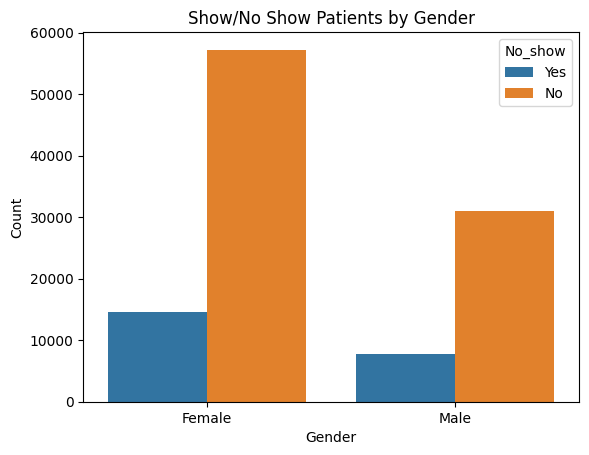

In [ ]:
#Creating a countplot
ax = sns.countplot(data = merge_df, x = 'Gender', hue = 'No_show')
ax.set_title('Show/No Show Patients by Gender')
x_ticks_labels= ['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.ylabel('Count')
plt.show()

### Scholarship in this data set reperesents government assistance for medical purposes

/tmp/ipython-input-43-599613100.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_ticks_labels)


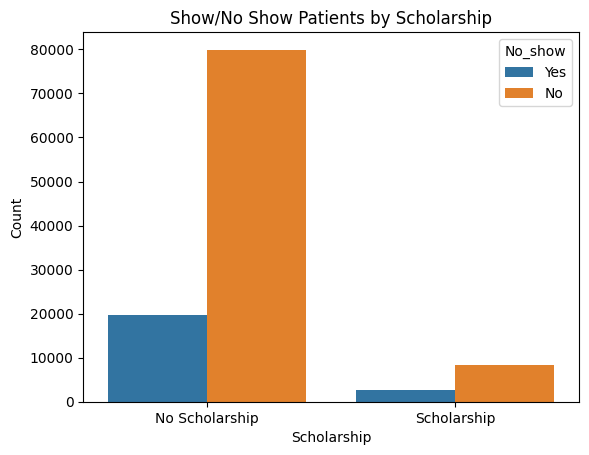

In [ ]:
ax = sns.countplot(data = merge_df, x = 'Scholarship', hue = 'No_show')
ax.set_title('Show/No Show Patients by Scholarship')
x_ticks_labels = ['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.ylabel('Count')
plt.show()

### Creating a Countplot of patients who did not show up by Neigbourhood Class.

/tmp/ipython-input-44-3063460407.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_ticks_labels)


Text(0, 0.5, 'Count')

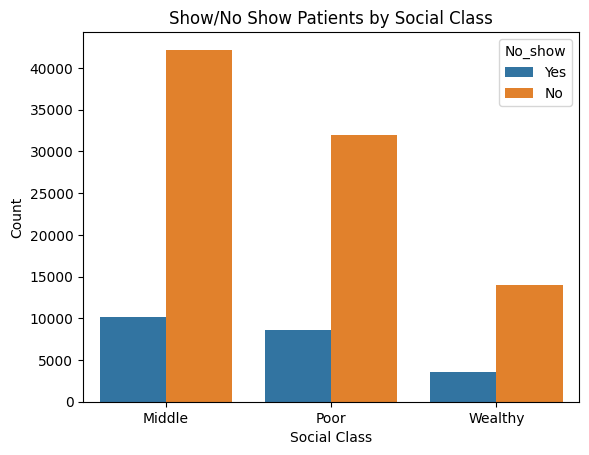

In [ ]:
ax = sns.countplot(data = merge_df, x = 'Neighbourhood_Class', hue = 'No_show')
ax.set_title('Show/No Show Patients by Social Class')
x_ticks_labels = ['Middle', 'Poor', 'Wealthy']
ax.set_xticklabels(x_ticks_labels)
plt.xlabel('Social Class')
plt.ylabel('Count')

/tmp/ipython-input-45-3156635129.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_ticks_labels)


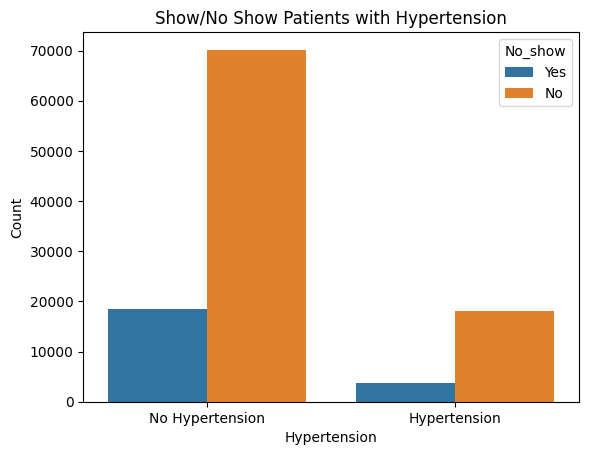

In [ ]:
ax = sns.countplot(data = merge_df, x = 'Hypertension', hue = 'No_show')
ax.set_title('Show/No Show Patients with Hypertension')
x_ticks_labels = ['No Hypertension', 'Hypertension']
ax.set_xticklabels(x_ticks_labels)
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-46-1170400427.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_ticks_labels)


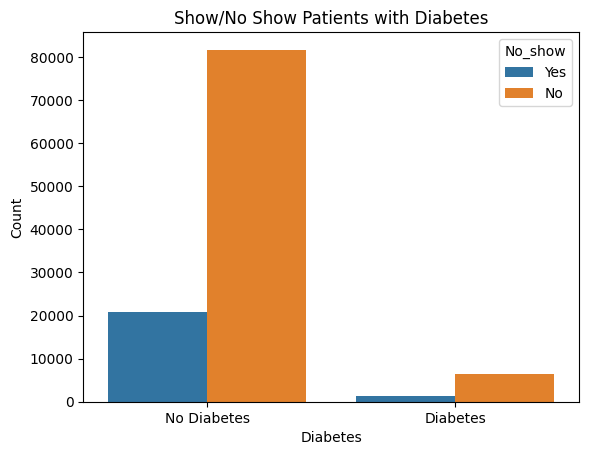

In [ ]:
ax = sns.countplot(data = merge_df, x = 'Diabetes', hue = 'No_show')
ax.set_title('Show/No Show Patients with Diabetes')
x_ticks_labels = ['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-47-753370619.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_ticks_labels)


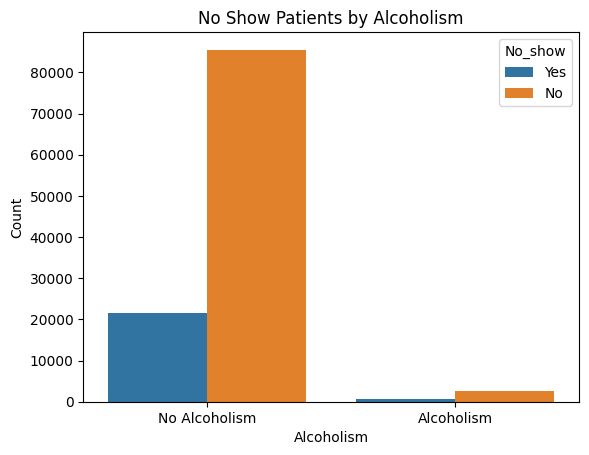

In [ ]:
ax = sns.countplot(data = merge_df, x = 'Alcoholism', hue = 'No_show')
ax.set_title('No Show Patients by Alcoholism')
x_ticks_labels = ['No Alcoholism', 'Alcoholism']
ax.set_xticklabels(x_ticks_labels)
plt.ylabel('Count')
plt.show()

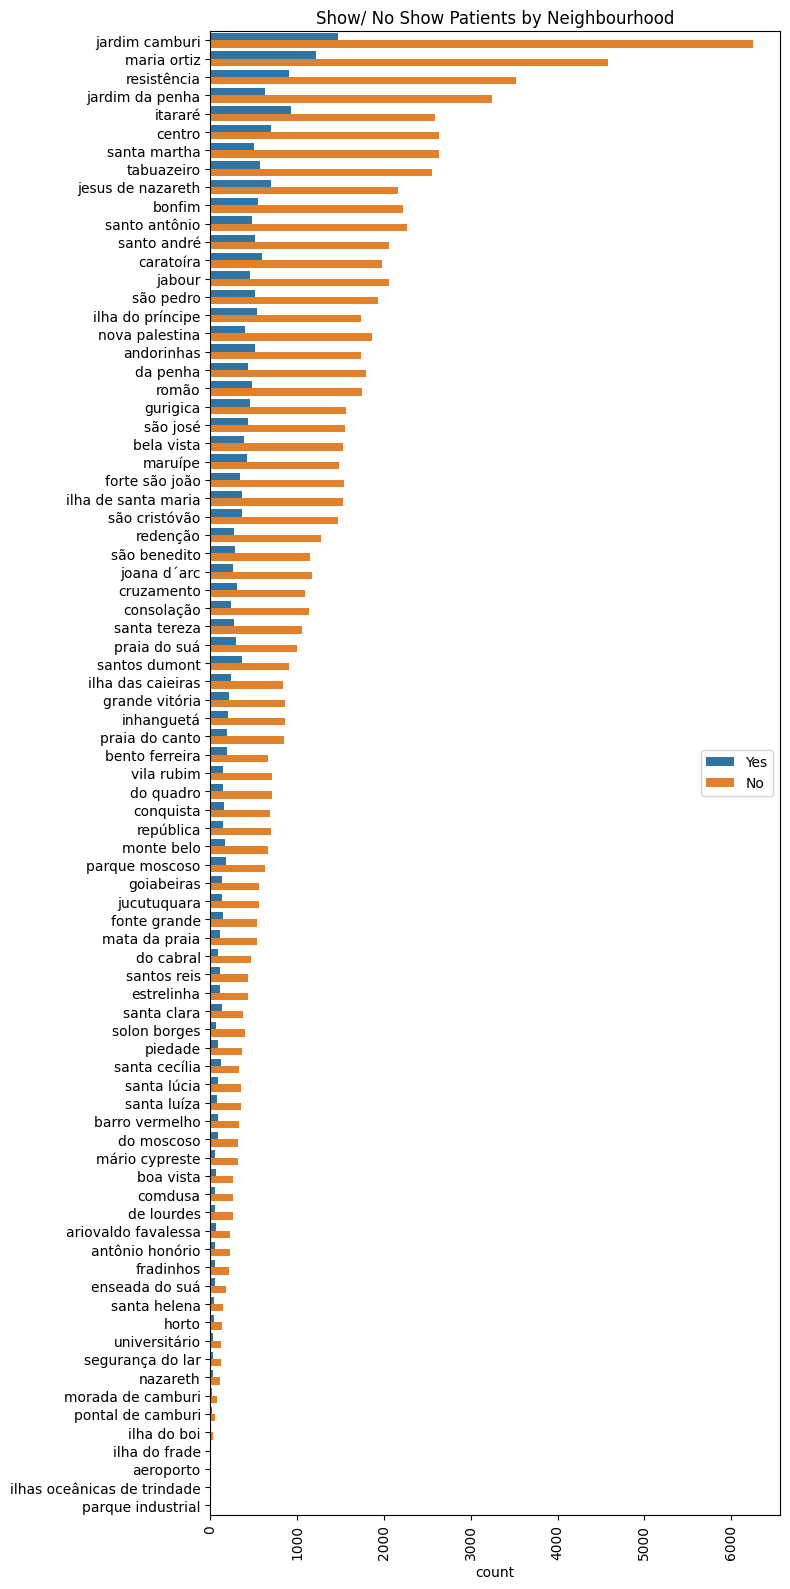

In [ ]:
#Visualising the cities who had the most no_shows
plt.figure(figsize=(8,16))
plt.xticks(rotation = 90)
ax = sns.countplot(y = np.sort(merge_df.Neighbourhood), hue = 'No_show',
                   order = merge_df.Neighbourhood.value_counts().index,
                   data = merge_df)
ax.set_title('Show/ No Show Patients by Neighbourhood')
plt.legend(loc = 'center right')
plt.tight_layout()
plt.show()

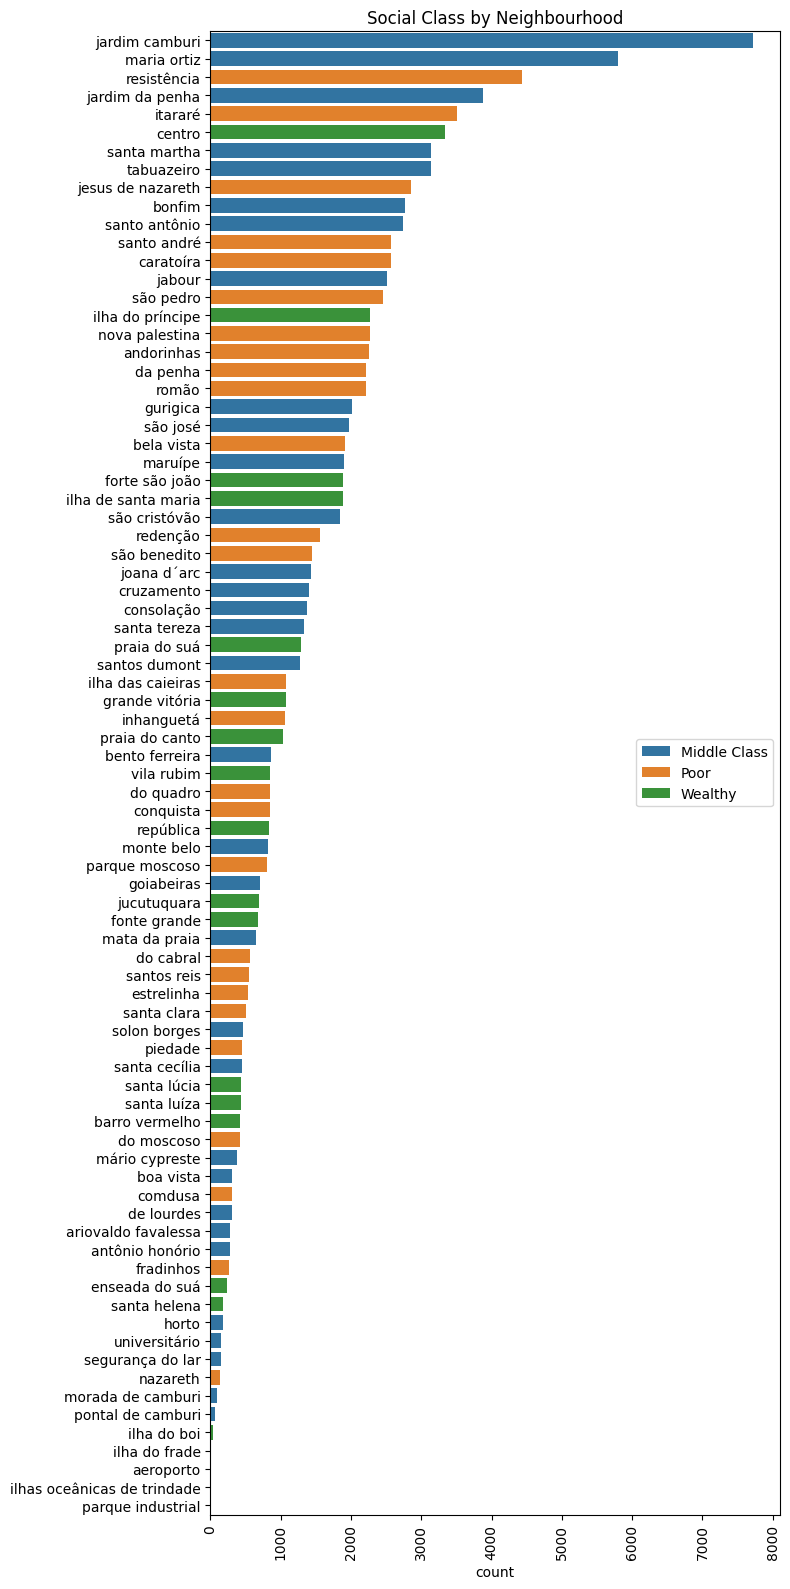

In [ ]:
plt.figure(figsize=(8,16))
plt.xticks(rotation = 90)
ax = sns.countplot(y = np.sort(merge_df.Neighbourhood),
                   hue = 'Neighbourhood_Class',
                   order = merge_df.Neighbourhood.value_counts().index,
                   data = merge_df)
ax.set_title('Social Class by Neighbourhood')
plt.legend(loc = 'center right')
plt.tight_layout()
plt.show()

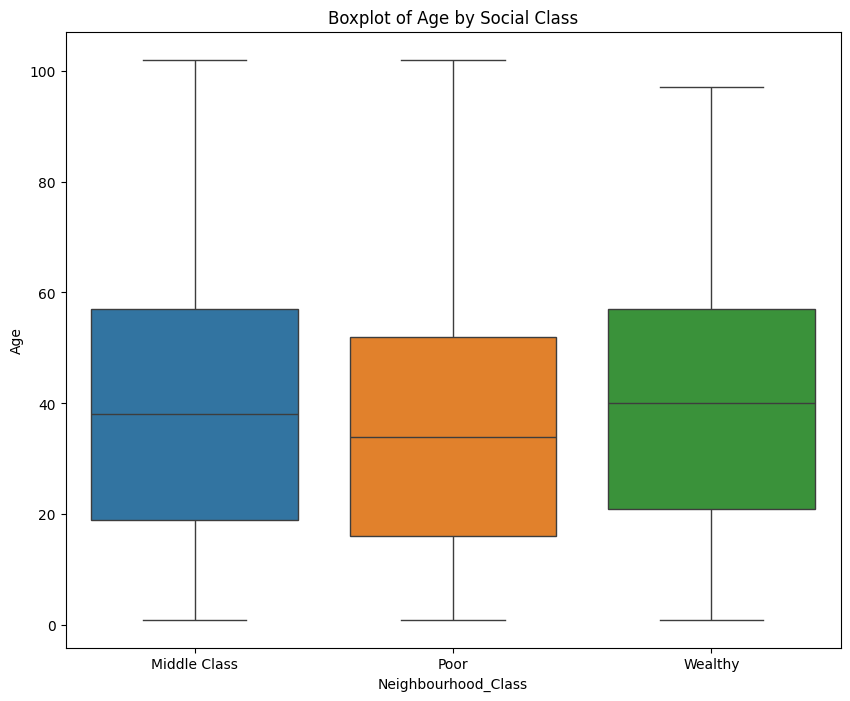

In [ ]:
#Creating a boxplot for Age based on Neighbourhood_Class
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(x = 'Neighbourhood_Class', y = 'Age',
                 hue = 'Neighbourhood_Class', data = merge_df)
ax.set_title('Boxplot of Age by Social Class')
plt.show()

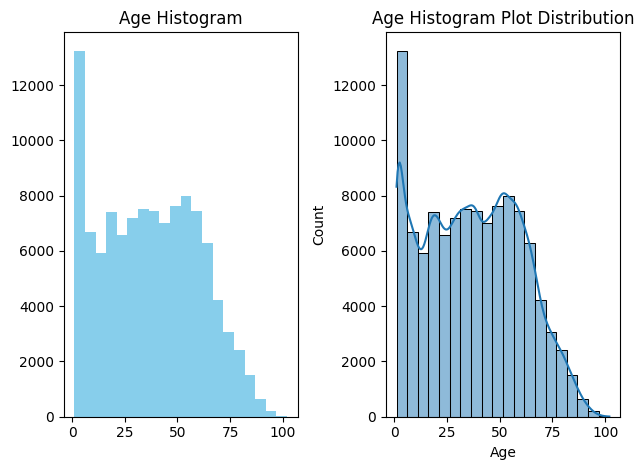

In [ ]:
fig,ax = plt.subplots(1,2, tight_layout = True)
ax[0].hist(merge_df['Age'], bins = 20, color = 'skyblue')
ax[0].set_title('Age Histogram')
sns.histplot(merge_df['Age'], bins = 20, kde = True)
ax[1].set_title('Age Histogram Plot Distribution')
plt.show()


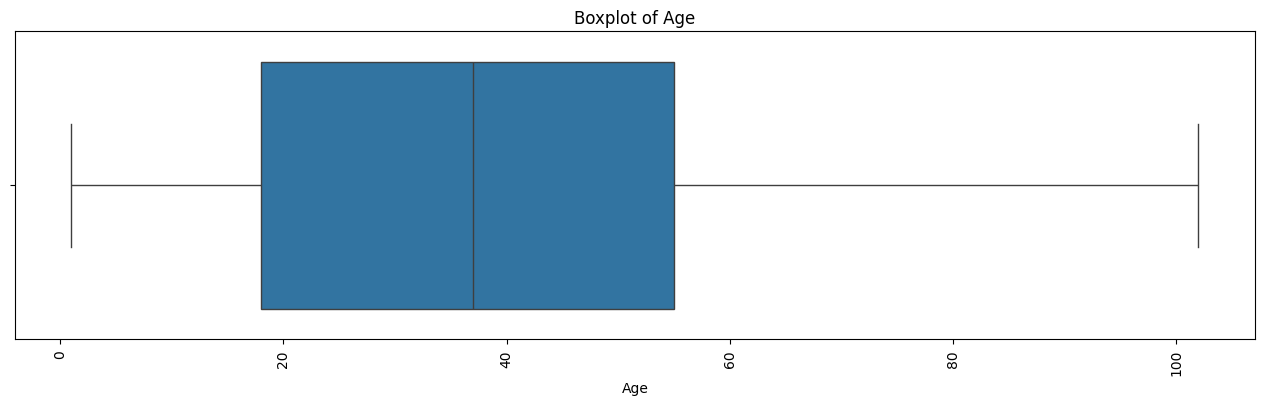

In [ ]:
plt.figure(figsize = (16,4))
plt.xticks(rotation = 90)
sns.boxplot(x = 'Age', data = merge_df)
plt.title('Boxplot of Age')
plt.show()

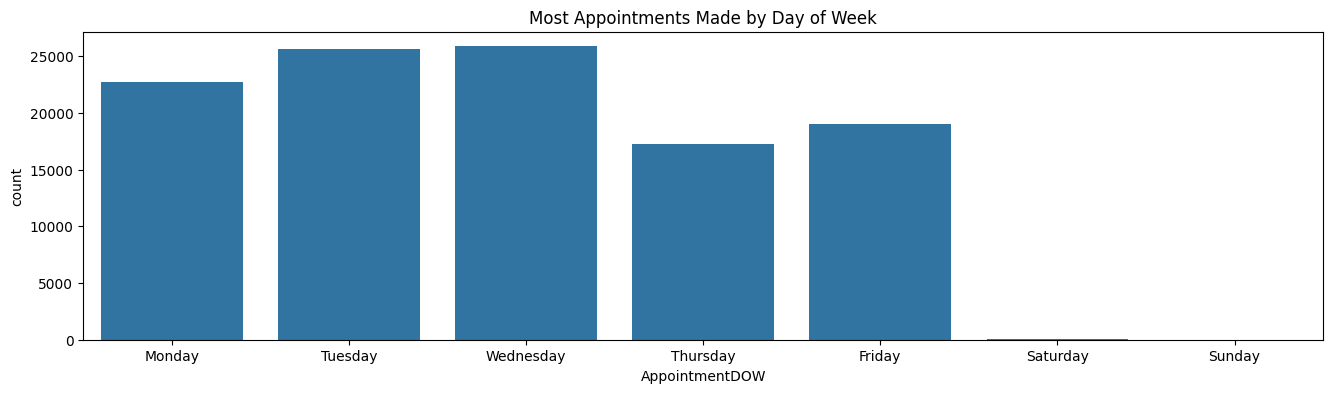

In [ ]:
#Getting the days of the week for appoinment days
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize = (16,4))
sns.countplot(x = merge_df.AppointmentDOW, order = days_of_week)
plt.title('Most Appointments Made by Day of Week')
plt.show()

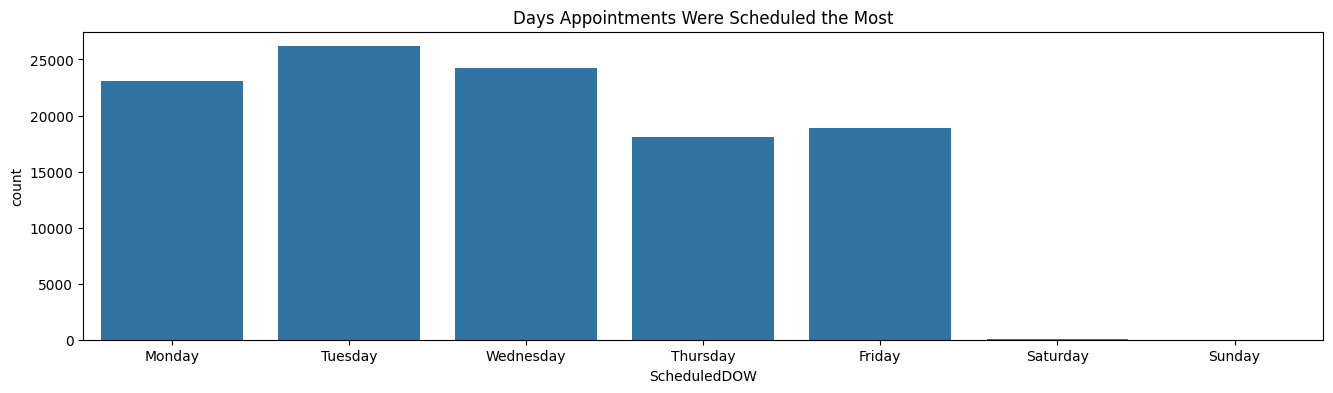

In [ ]:
plt.figure(figsize = (16,4))
sns.countplot(x = merge_df.ScheduledDOW, order = days_of_week)
plt.title('Days Appointments Were Scheduled the Most')
plt.show()

AppointmentDOW
Friday       0.787727
Monday       0.793589
Saturday     0.769231
Thursday     0.806599
Tuesday      0.799126
Wednesday    0.803139
dtype: float64


/tmp/ipython-input-55-578445965.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = DOW_ratio.index, y = DOW_ratio,


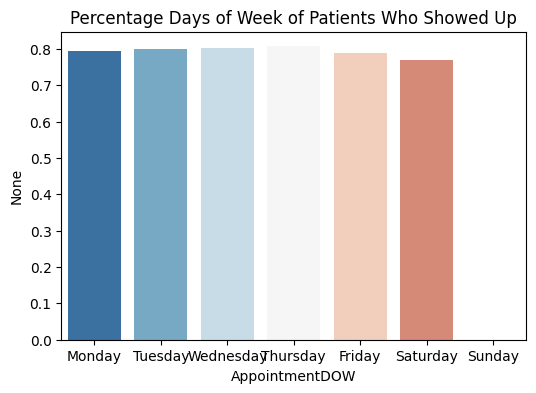

In [ ]:
#Percentage of women and men where No_Show = 'No'
#Getting gender ration where No_Show == 'no'
DOW_ratio = merge_df[merge_df.No_show =='No'].groupby('AppointmentDOW').size()/merge_df.groupby('AppointmentDOW').size()
print(DOW_ratio)
plt.figure(figsize = (6,4))
ax = sns.barplot(x = DOW_ratio.index, y = DOW_ratio,
                      palette="RdBu_r", order = days_of_week)
ax.set_title('Percentage Days of Week of Patients Who Showed Up')
plt.show()

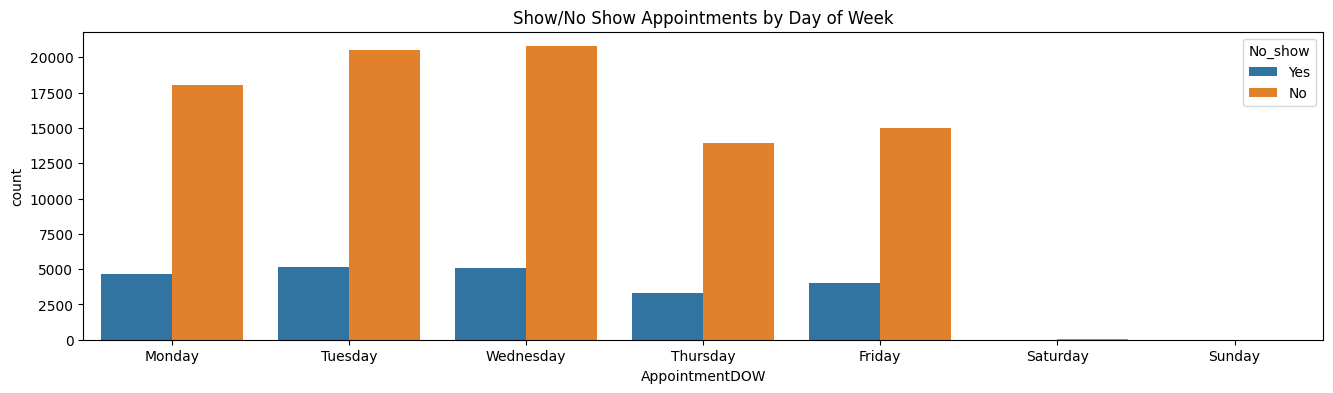

In [ ]:
plt.figure(figsize = (16,4))
sns.countplot(x =merge_df.AppointmentDOW, hue =merge_df.No_show,
              order = days_of_week)
plt.title('Show/No Show Appointments by Day of Week')
plt.show()

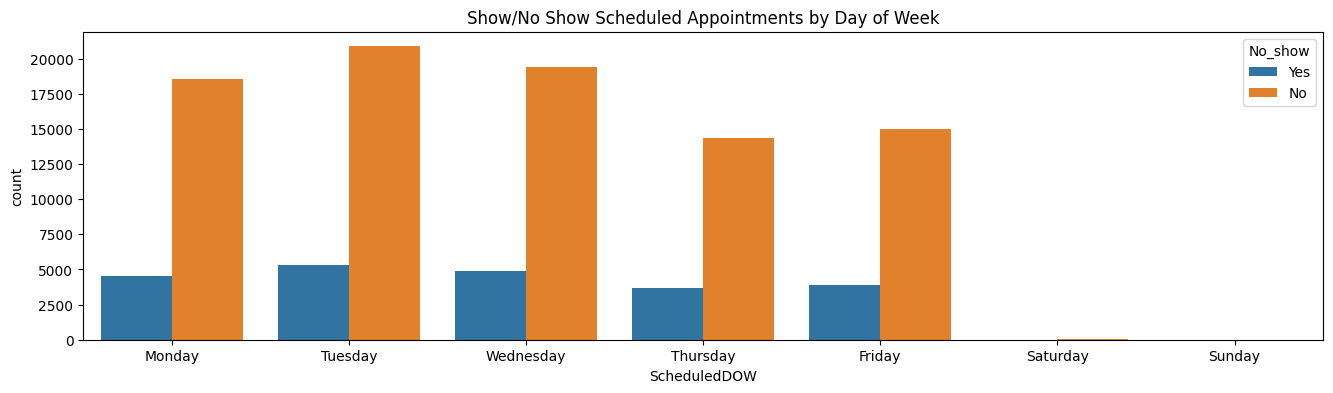

In [ ]:
plt.figure(figsize = (16,4))
sns.countplot(x = merge_df.ScheduledDOW, hue = merge_df.No_show,
              order = days_of_week)
plt.title('Show/No Show Scheduled Appointments by Day of Week')
plt.show()

ScheduledDOW
Friday       0.794544
Monday       0.802487
Saturday     0.958333
Thursday     0.795307
Tuesday      0.797837
Wednesday    0.799002
dtype: float64


/tmp/ipython-input-58-1385321438.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = scheduled_ratio.index, y = scheduled_ratio, palette='RdBu_r', order = days_of_week)


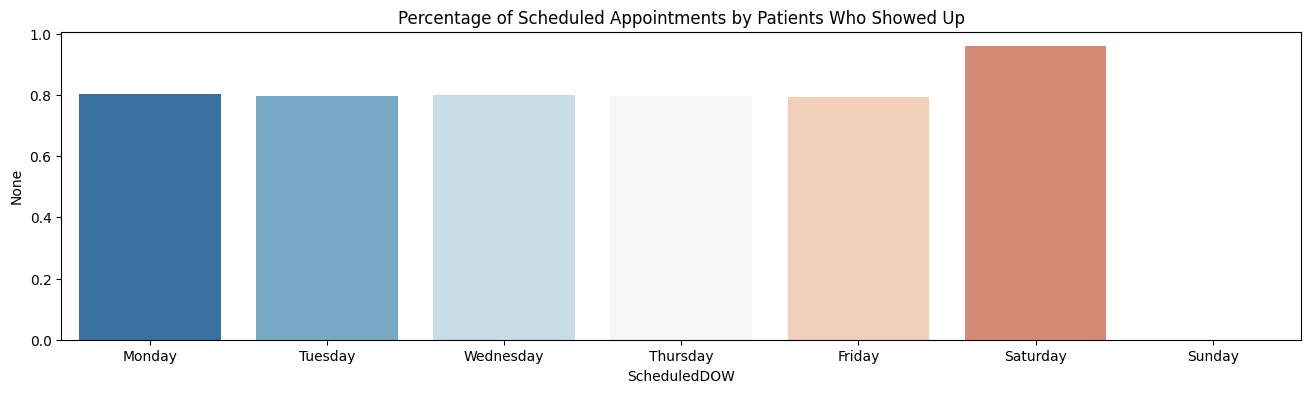

In [ ]:
scheduled_ratio = merge_df[merge_df.No_show =='No'].groupby('ScheduledDOW').size()/merge_df.groupby('ScheduledDOW').size()
print(scheduled_ratio)
plt.figure(figsize = (16,4))
sns.barplot(x = scheduled_ratio.index, y = scheduled_ratio, palette='RdBu_r', order = days_of_week)
plt.title('Percentage of Scheduled Appointments by Patients Who Showed Up')
plt.show()

Neighbourhood
aeroporto              0.875000
andorinhas             0.770593
antônio honório        0.815498
ariovaldo favalessa    0.780142
barro vermelho         0.784870
                         ...   
são josé               0.783401
são pedro              0.789624
tabuazeiro             0.817311
universitário          0.789474
vila rubim             0.834313
Length: 81, dtype: float64


/tmp/ipython-input-59-22819406.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = pop_ratio.index, y = pop_ratio, palette = 'RdBu_r')


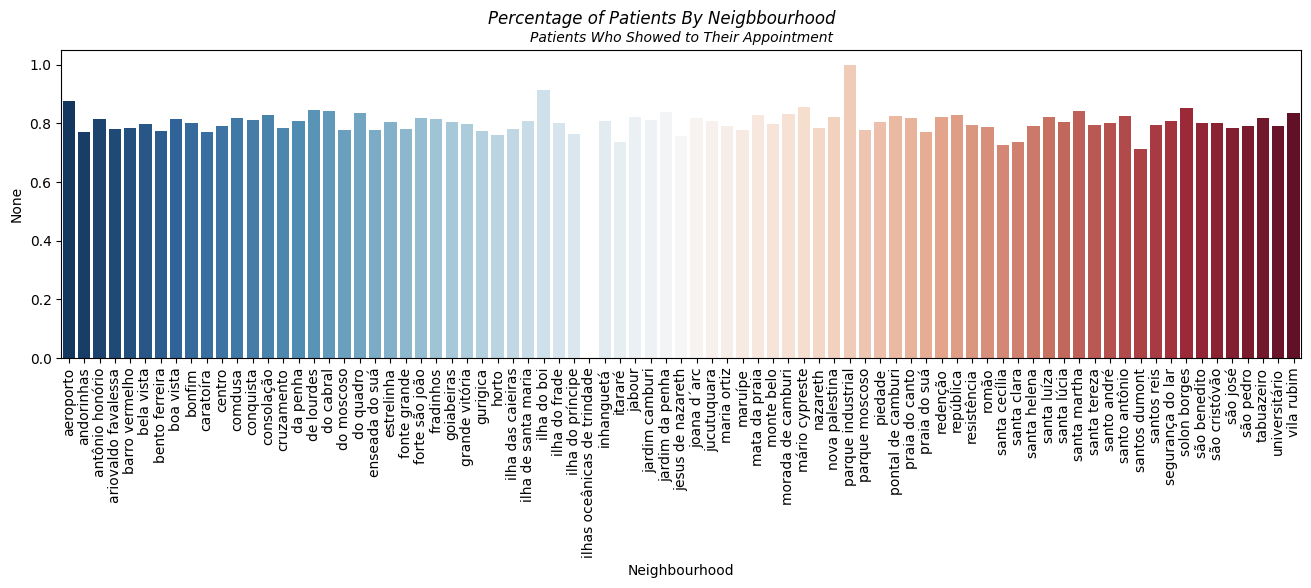

In [ ]:
pop_ratio = merge_df[merge_df.No_show =='No'].groupby('Neighbourhood').size()/merge_df.groupby('Neighbourhood').size()
print(pop_ratio)
plt.figure(figsize = (16,4))
plt.xticks(rotation = 90)
sns.barplot(x = pop_ratio.index, y = pop_ratio, palette = 'RdBu_r')
plt.suptitle('Percentage of Patients By Neigbbourhood',
             fontstyle = 'oblique') #Header
plt.title('Patients Who Showed to Their Appointment', fontsize = 10,
          fontstyle = 'italic') #subtitle
plt.show()

/tmp/ipython-input-60-2200084196.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = np.sort(merge_df.Neighbourhood), palette = 'icefire')


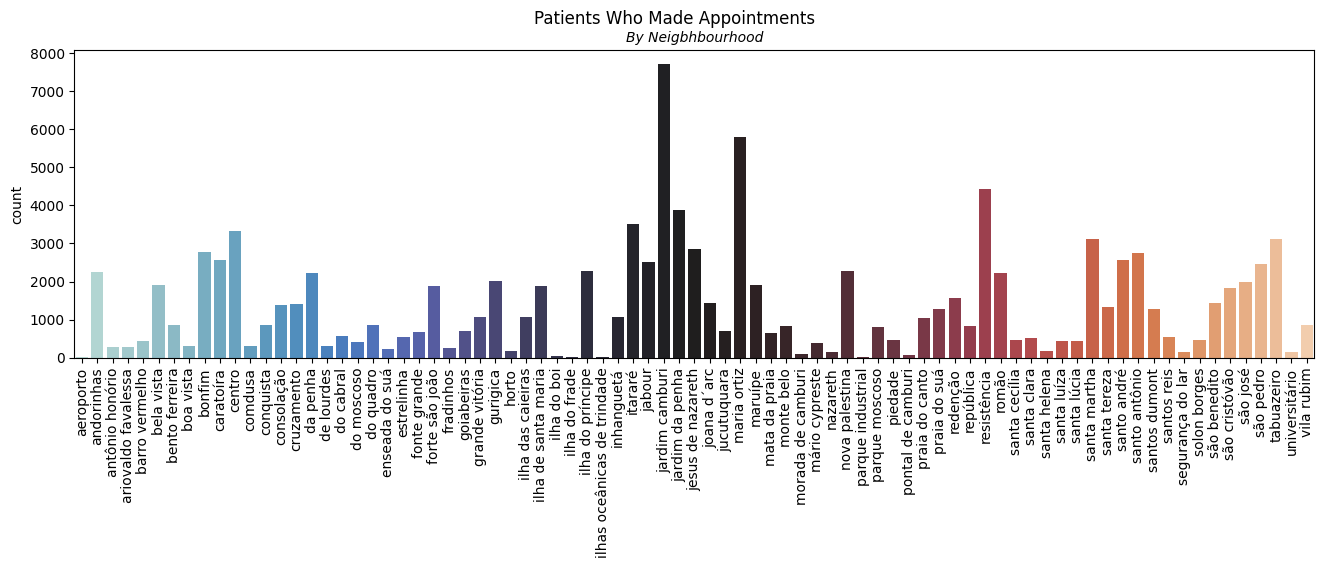

In [ ]:
plt.figure(figsize = (16,4))
plt.xticks(rotation = 90)
sns.countplot(x = np.sort(merge_df.Neighbourhood), palette = 'icefire')
plt.suptitle('Patients Who Made Appointments')
plt.title('By Neigbhbourhood', fontsize = 10, fontstyle = 'italic')
plt.show()

/tmp/ipython-input-61-2523937798.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = np.sort(merge_df.Neighbourhood),stat = 'percent', palette = 'magma')


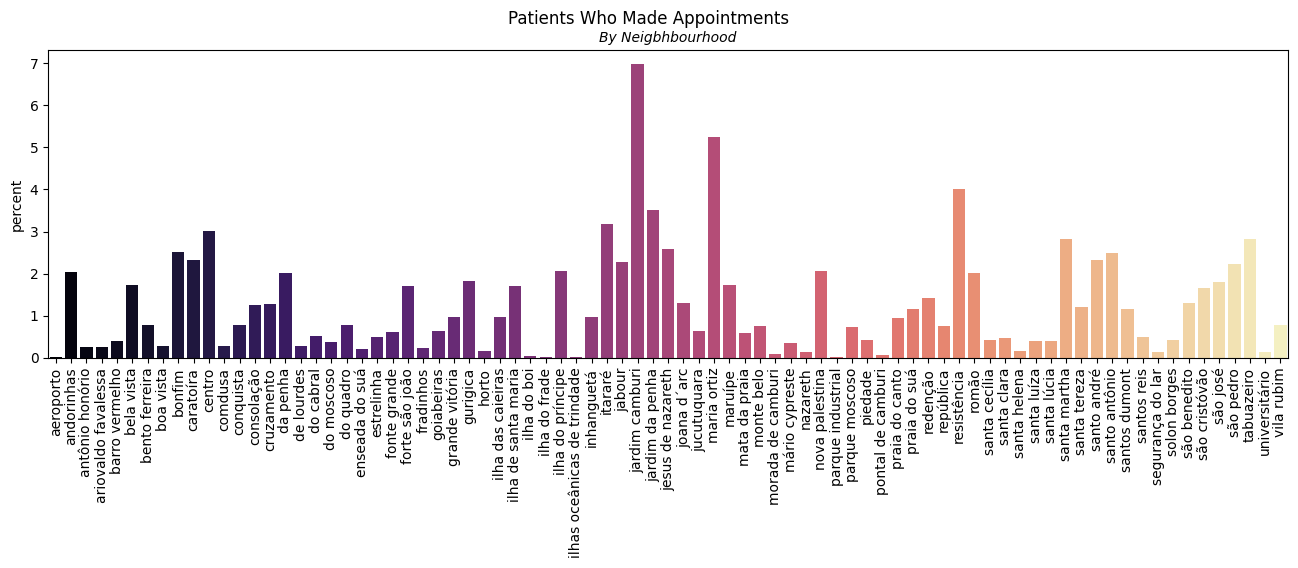

In [ ]:
plt.figure(figsize = (16,4))
plt.xticks(rotation = 90)
sns.countplot(x = np.sort(merge_df.Neighbourhood),stat = 'percent', palette = 'magma')
plt.suptitle('Patients Who Made Appointments')
plt.title('By Neigbhbourhood', fontsize = 10, fontstyle = 'italic')
plt.show()

In [ ]:
#Creating Logistic Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, classification_report

In [ ]:
#Changing gender from M and F to 1 and 0
merge_df['Gender'] = merge_df['Gender'].map({'M': 1, 'F': 0}) #1 = Male, 0 = Female
merge_df.head()

,Gender,ScheduledDay,ScheduledDOW,AppointmentDay,AppointmentDOW,Days_Btwn,Age,Neighbourhood,City,State,...,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Zip_code,WeekDay_Appointment,Days_In_Advanced,Neighbourhood_Class
0,0,2016-04-18,Monday,2016-05-05,Thursday,17 days,37,aeroporto,Vitória,Espirito Santo,...,0,0,0,0,0,Yes,29075-000,4,17,Middle Class
1,0,2016-05-02,Monday,2016-05-09,Monday,7 days,58,aeroporto,Vitória,Espirito Santo,...,0,0,0,0,0,No,29075-000,1,7,Middle Class
2,0,2016-05-10,Tuesday,2016-05-12,Thursday,2 days,58,aeroporto,Vitória,Espirito Santo,...,0,0,0,0,0,No,29075-000,4,2,Middle Class
3,1,2016-05-06,Friday,2016-05-06,Friday,0 days,51,aeroporto,Vitória,Espirito Santo,...,0,0,0,0,0,No,29075-000,5,0,Middle Class
4,0,2016-03-03,Thursday,2016-05-17,Tuesday,75 days,64,aeroporto,Vitória,Espirito Santo,...,1,0,0,0,0,No,29075-000,2,75,Middle Class


In [ ]:
merge_df['target'] = merge_df['No_show'].map({'No': 0, 'Yes': 1})

In [ ]:
#Checking unique values of differnt cols
merge_df['Days_Btwn'].nunique()

129

In [ ]:
merge_df['Days_Btwn'].describe()

,Days_Btwn
count,110517
mean,10 days 04:25:13.135535709
std,15 days 06:07:26.049984196
min,0 days 00:00:00
25%,0 days 00:00:00
50%,4 days 00:00:00
75%,15 days 00:00:00
max,179 days 00:00:00


In [ ]:
#Convertitng Days_Btwn to fload
merge_df['Days_Btwn']= merge_df['Days_Btwn'].dt.days
merge_df['Days_Btwn'].describe()

,Days_Btwn
count,110517.000000
mean,10.184180
std,15.255163
min,0.000000
25%,0.000000
50%,4.000000
75%,15.000000
max,179.000000


In [ ]:
#Getting dummies
categoric_cols = pd.get_dummies(merge_df, columns = ['Neighbourhood_Class',
                                                     'ScheduledDOW', 'AppointmentDOW',
                                                     'City','State', 'Zip_code'
                                                     ], drop_first= True)

#Assigning numbers to Neighbourhoods based on how often it appears
neigh_freq = merge_df['Neighbourhood'].value_counts().to_dict()
merge_df['Neighbourhood'] = merge_df['Neighbourhood'].map(neigh_freq)

#### Since we already have ScheduledDay and AppointmentDOW, we can delete
#### ScheduledDay and AppointmentDay since they won't work with Logistgic Reg

In [ ]:
merge_df.drop(['ScheduledDay', 'AppointmentDay'], axis = 1, inplace= True)

In [ ]:
merge_df['Days_In_Advanced'].describe()
#There are -1s for Days_in_Advanced. changing those to 0s
merge_df['Days_In_Advanced'] = merge_df['Days_In_Advanced'].replace(-1,0)

In [ ]:
merge_df['Days_In_Advanced'].describe() #Making sure the code above worked

,Days_In_Advanced
count,110517.000000
mean,10.184180
std,15.255163
min,0.000000
25%,0.000000
50%,4.000000
75%,15.000000
max,179.000000


In [ ]:
merge_df.head()

,Gender,ScheduledDOW,AppointmentDOW,Days_Btwn,Age,Neighbourhood,City,State,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Zip_code,WeekDay_Appointment,Days_In_Advanced,Neighbourhood_Class,target
0,0,Monday,Thursday,17,37,8,Vitória,Espirito Santo,0,0,0,0,0,0,Yes,29075-000,4,17,Middle Class,1
1,0,Monday,Monday,7,58,8,Vitória,Espirito Santo,0,0,0,0,0,0,No,29075-000,1,7,Middle Class,0
2,0,Tuesday,Thursday,2,58,8,Vitória,Espirito Santo,0,0,0,0,0,0,No,29075-000,4,2,Middle Class,0
3,1,Friday,Friday,0,51,8,Vitória,Espirito Santo,0,0,0,0,0,0,No,29075-000,5,0,Middle Class,0
4,0,Thursday,Tuesday,75,64,8,Vitória,Espirito Santo,0,1,0,0,0,0,No,29075-000,2,75,Middle Class,0


In [ ]:
#Getting Numeric features
num_cols = ['Gender', 'Days_Btwn', 'Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Days_In_Advanced']


In [ ]:
#Collecating all the dunmmy vars
dummy_vars = [col for col in categoric_cols.columns if col.startswith(
    ('Neighbourhood_Class_', 'ScheduledDOW_', 'AppointmentDOW_', 'City_', 'State_',
    'Zip_code_')
)]

### Let's Start making our Logistic Regression!!

In [ ]:
#Importing StandardScaler
from sklearn.preprocessing import StandardScaler
feature_cols = num_cols + dummy_vars
X = categoric_cols[feature_cols]
y = merge_df['target']
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled [num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled [ num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
#Fitting the Model
model = LogisticRegression(max_iter = 1000, class_weight= 'balanced')
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
#Evaluating Model
y_pred = model.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[12055  5525]
 [ 1929  2595]]
Accuracy Score: 0.662775968150561
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.69      0.76     17580
           1       0.32      0.57      0.41      4524

    accuracy                           0.66     22104
   macro avg       0.59      0.63      0.59     22104
weighted avg       0.75      0.66      0.69     22104



In [ ]:
#Tuning Probability Threshold
y_prob = model.predict_proba(X_test_scaled) [:, 1]

y_pred_cust = (y_prob >= 0.4).astype(int)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cust))
print("Classification Report:\n", classification_report(y_test, y_pred_cust))

Confusion Matrix:
 [[ 6369 11211]
 [  686  3838]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.36      0.52     17580
           1       0.26      0.85      0.39      4524

    accuracy                           0.46     22104
   macro avg       0.58      0.61      0.45     22104
weighted avg       0.77      0.46      0.49     22104



In [ ]:
for t in [0.3, 0.4, 0.5, 0.6]:
    y_pred_t = (y_prob >= t).astype(int)
    print(f"Threshold: {t}")
    print(confusion_matrix(y_test, y_pred_t))
    print(classification_report(y_test, y_pred_t))
    print("-----------")

Threshold: 0.3
[[  719 16861]
 [   57  4467]]
              precision    recall  f1-score   support

           0       0.93      0.04      0.08     17580
           1       0.21      0.99      0.35      4524

    accuracy                           0.23     22104
   macro avg       0.57      0.51      0.21     22104
weighted avg       0.78      0.23      0.13     22104

-----------
Threshold: 0.4
[[ 6369 11211]
 [  686  3838]]
              precision    recall  f1-score   support

           0       0.90      0.36      0.52     17580
           1       0.26      0.85      0.39      4524

    accuracy                           0.46     22104
   macro avg       0.58      0.61      0.45     22104
weighted avg       0.77      0.46      0.49     22104

-----------
Threshold: 0.5
[[12055  5525]
 [ 1929  2595]]
              precision    recall  f1-score   support

           0       0.86      0.69      0.76     17580
           1       0.32      0.57      0.41      4524

    accuracy        

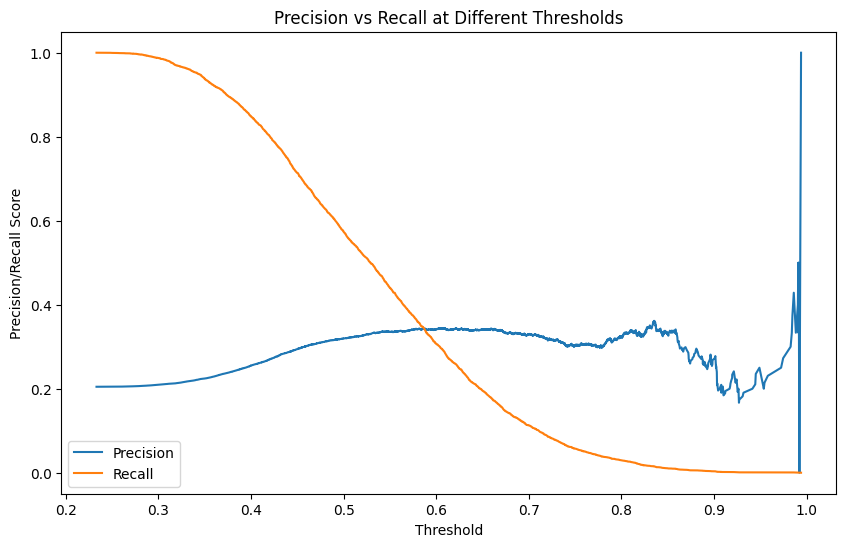

In [ ]:
#Plotting precision - recall vs threshold curve
from sklearn.metrics import precision_recall_curve, f1_score
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
plt.figure (figsize = (10,6))
plt.plot(thresholds, precision[1:], label = 'Precision')
plt.plot(thresholds, recall[1:], label = 'Recall')
plt.xlabel ('Threshold')
plt.ylabel ('Precision/Recall Score')
plt.title('Precision vs Recall at Different Thresholds')
plt.legend()
plt.show()


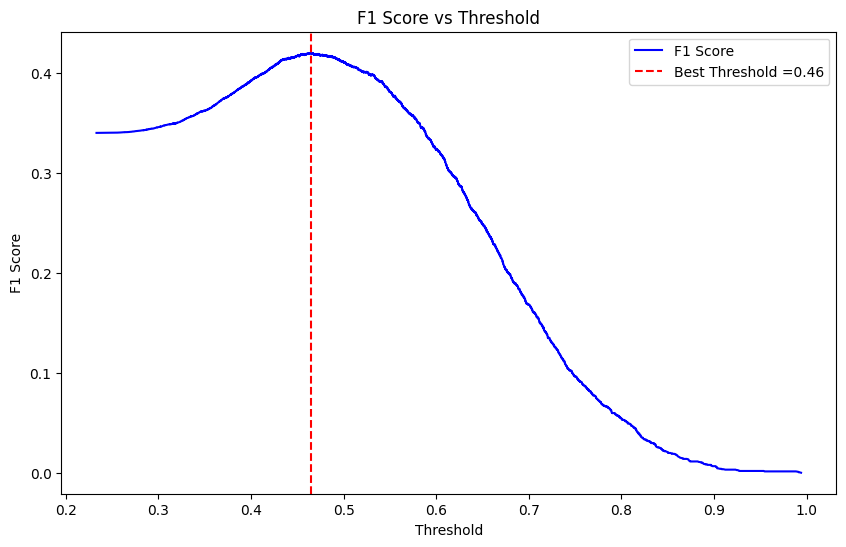

The Best Threshold is: 0.46
The Best F1 Score is: 0.42


In [ ]:
#Plottin the F-1 score for differnt thresholds
plt.figure(figsize = (10, 6))
#Calcs the f1_score for each threshold
f1_scores  = 2 * (precision * recall) / (precision + recall + 1e-8)

#Finds the index for the best f1_score
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]
best_f1 = f1_scores[best_index]

#Plotting F_1 vs Threshold
plt.plot(thresholds, f1_scores[:-1], label = 'F1 Score', color = 'blue')
plt.axvline(x = best_threshold, color = 'red', linestyle = '--', label = f'Best Threshold ={best_threshold:.2f}')
plt.title( 'F1 Score vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

print(f'The Best Threshold is: {best_threshold:.2f}')
print(f'The Best F1 Score is: {best_f1:.2f}')

In [ ]:
#Applying optimal threshold
y_pred_opt = (y_prob >= 0.52).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_opt))
print('Classification Report:\n', classification_report(y_test, y_pred_opt))

Confusion Matrix:
 [[12706  4874]
 [ 2164  2360]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78     17580
           1       0.33      0.52      0.40      4524

    accuracy                           0.68     22104
   macro avg       0.59      0.62      0.59     22104
weighted avg       0.75      0.68      0.70     22104



In [ ]:
#Gettign the coefficients
coeff_df = pd.DataFrame({'Feature': feature_cols,
                     'Coefficients': model.coef_[0]})

#Interpreteations of coefficients
coeff_df['Absolute Coefficients'] = coeff_df['Coefficients'].abs()
coeff_df ['Effect Direction'] = coeff_df['Coefficients'].apply(lambda x: 'Increase No Show' if x > 0 else 'Decrease No Show')

#Sorts by importance
coeff_df.sort_values(by = 'Absolute Coefficients', ascending = False, inplace = True)
coeff_df.head()

,Feature,Coefficients,Absolute Coefficients,Effect Direction
18,AppointmentDOW_Saturday,0.560912,0.560912,Increase No Show
45,Zip_code_29090-000,-0.548536,0.548536,Decrease No Show
13,ScheduledDOW_Saturday,-0.500034,0.500034,Decrease No Show
41,Zip_code_29060-000,-0.479587,0.479587,Decrease No Show
38,Zip_code_29053-000,-0.442402,0.442402,Decrease No Show


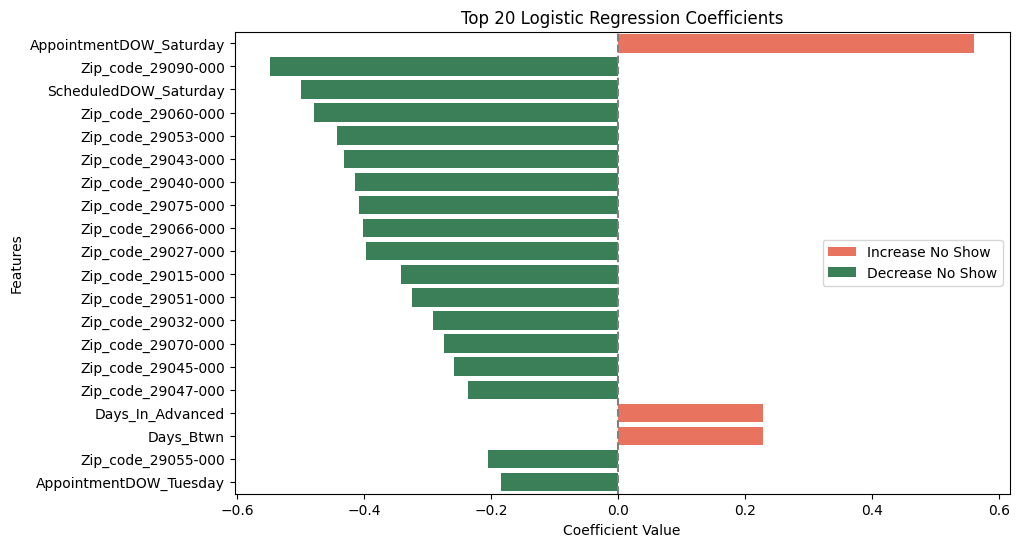

In [ ]:
#Plotting top 20 features
top_feat = 20
top_coeff = coeff_df.head(top_feat)

plt.figure(figsize = (10, 6))
sns.barplot( data = top_coeff, y = 'Feature', x = 'Coefficients',
            hue = 'Effect Direction',
             palette = {'Increase No Show': 'tomato', 'Decrease No Show': 'seagreen'})
plt.axvline(0, color = 'gray', linestyle = '--')
plt.title (f'Top {top_feat} Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.legend(loc = 'center right')
plt.show()

In [ ]:
#installing XGBoost to compare Log model with
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

#Training XGBoost model with imbalanced datat
xgb_model = XGBClassifier( use_label_encoder = False,
                          eval_metric = 'logloss',
                           scale_pos_weight = len(y_train[y_train ==0])/ len(y_train[y_train == 1]),
                           random_state = 42)

xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:16:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
#Getting Predictions and Probabilities

y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

#Uses the same threshold from F1 Score vs Threshold graph
y_pred_xgb = xgb_model.predict(X_test>= 0.52).astype(int)

#Getting metrics
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_xgb))
print('Classification Report:\n',  classification_report(y_test, y_pred_xgb))
print('Accuracy Score:\n', accuracy_score(y_test, y_pred_xgb))
print('AUC:\n', roc_auc_score(y_test, y_pred_xgb))

Confusion Matrix:
 [[11146  6434]
 [ 1925  2599]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.63      0.73     17580
           1       0.29      0.57      0.38      4524

    accuracy                           0.62     22104
   macro avg       0.57      0.60      0.56     22104
weighted avg       0.74      0.62      0.66     22104

Accuracy Score:
 0.6218331523706117
AUC:
 0.6042537637718289


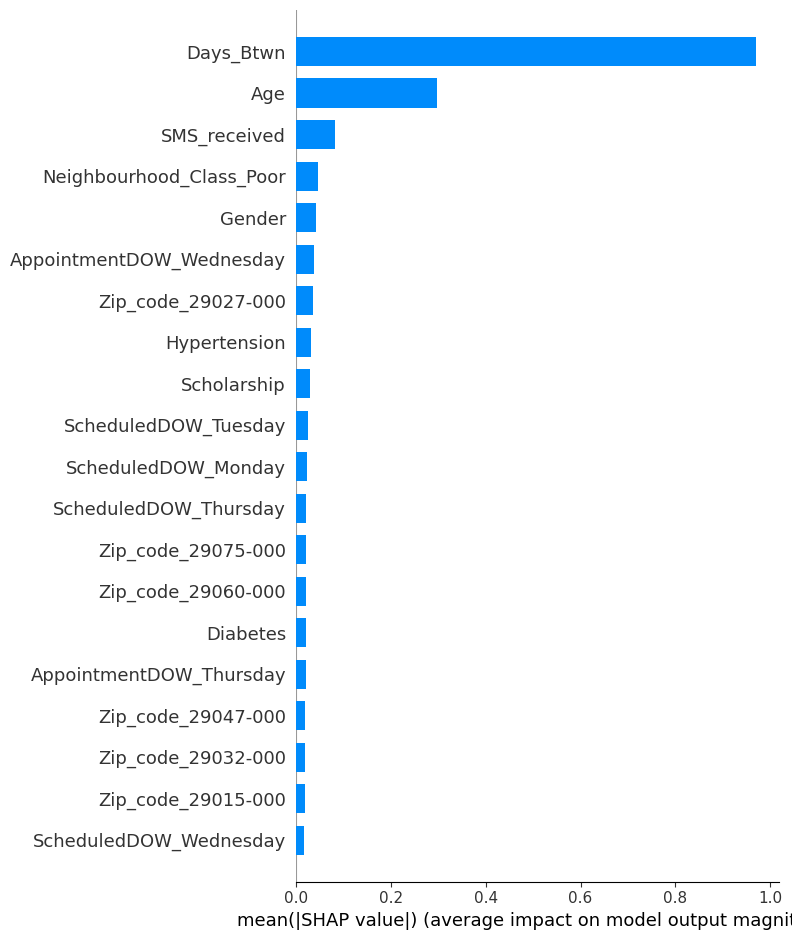

In [ ]:
import shap
explainer = shap.TreeExplainer(xgb_model)

shap_vals = explainer.shap_values(X_test)
shap.summary_plot(shap_vals, X_test, plot_type = 'bar')

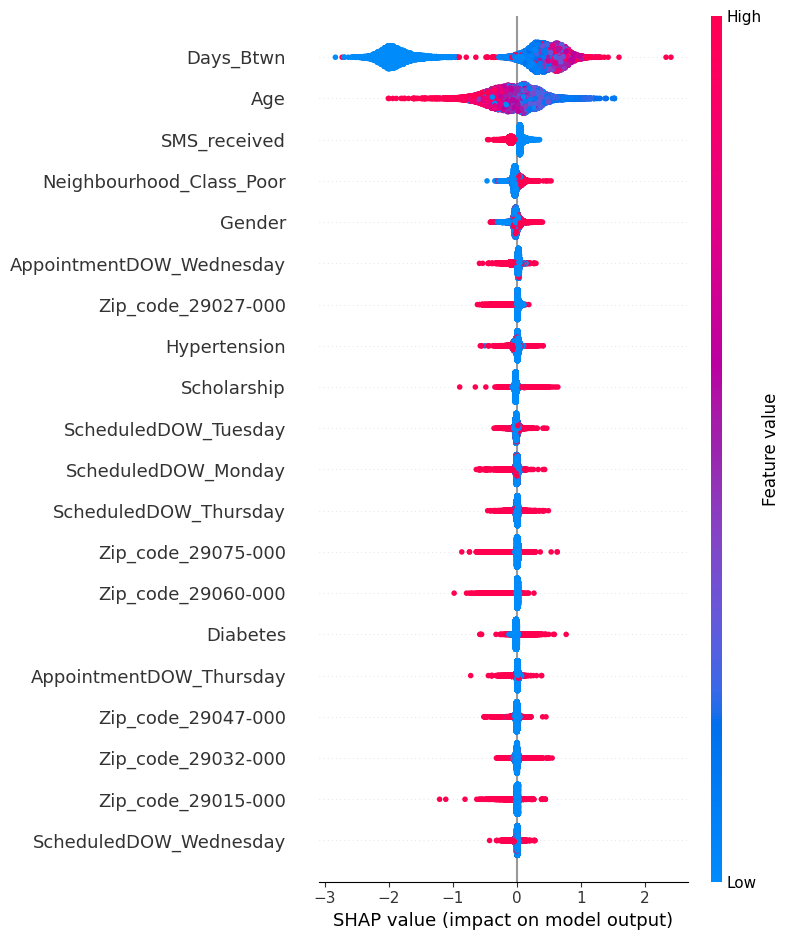

In [ ]:
import shap
X_for_shap = X_test.copy()
explainer = shap.TreeExplainer(xgb_model)
shap_vals = explainer.shap_values(X_for_shap)
shap.summary_plot(shap_vals, X_for_shap)

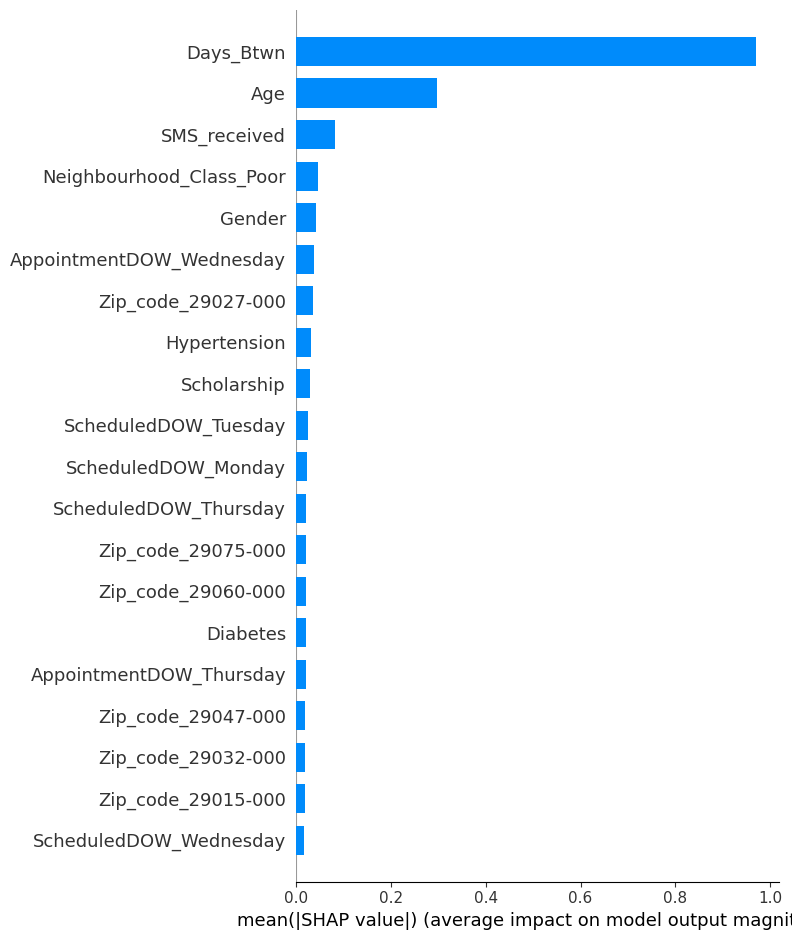

In [ ]:
shap.summary_plot(shap_vals, X_test, plot_type = 'bar')

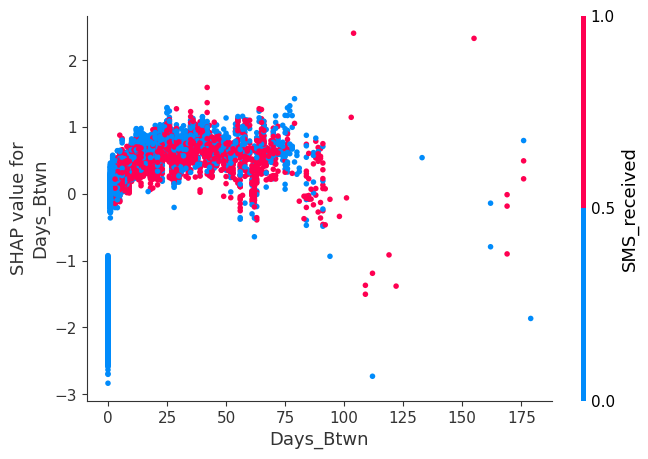

In [ ]:
shap.dependence_plot(
    'Days_Btwn',
    shap_vals,
    X_test,
    interaction_index='SMS_received'
)

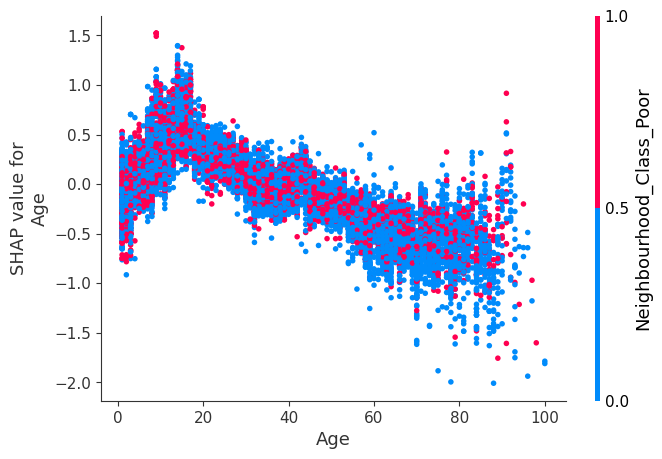

In [ ]:
shap.dependence_plot(
    'Age',
    shap_vals,
    X_test,
    interaction_index='Neighbourhood_Class_Poor'
) #Higher SHAP vals mean more likely to not show up

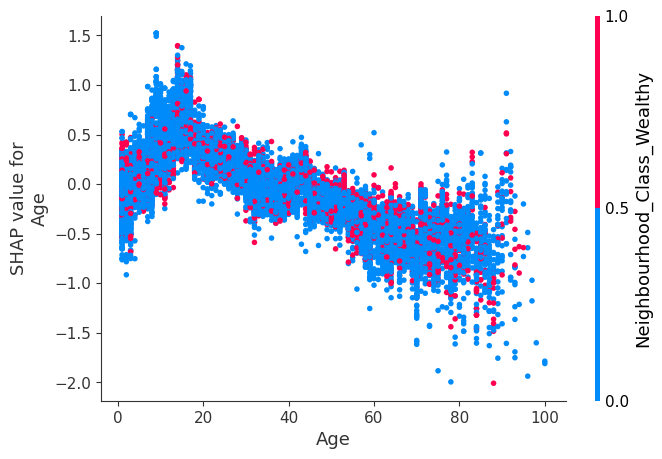

In [ ]:
shap.dependence_plot(
    'Age',
    shap_vals,
    X_test,
    interaction_index='Neighbourhood_Class_Wealthy'
)

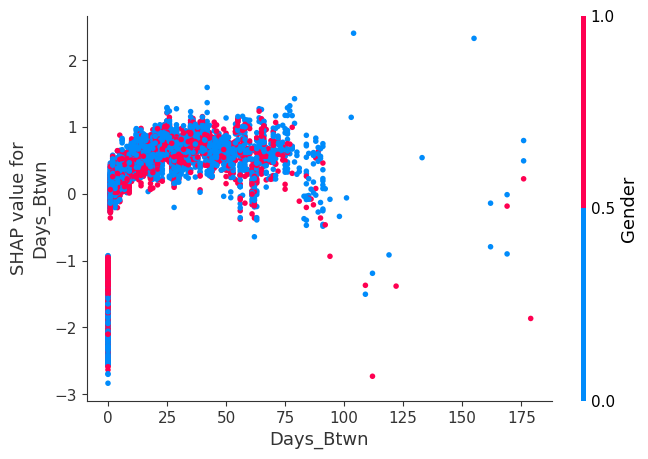

In [ ]:
shap.dependence_plot(
    'Days_Btwn',
    shap_vals,
    X_test,
    interaction_index='Gender'
) #Mostly 0

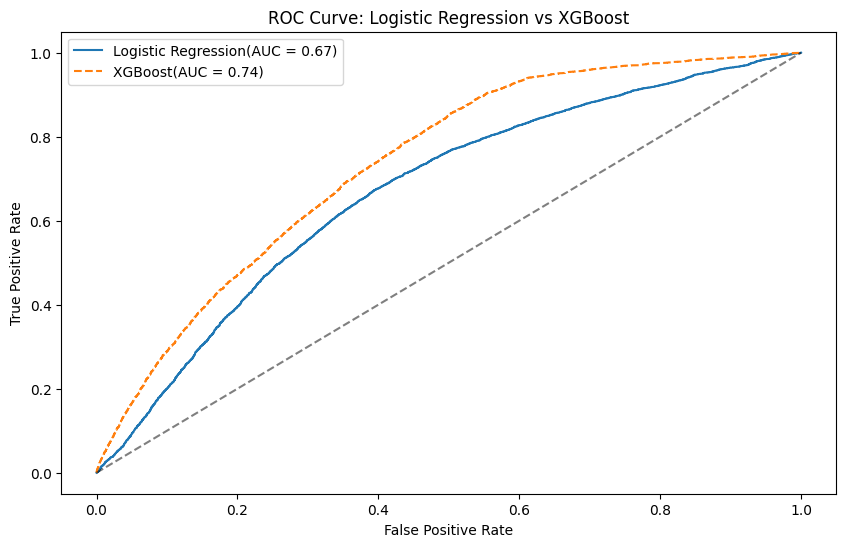

In [ ]:
from sklearn.metrics import roc_curve
#Getting false postive and true positive for log regress to compare with xgb
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob)
auc_logreg = roc_auc_score(y_test, y_prob)

#Comparing AUC and ROC for xgb
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb) #False positv and true postive rates
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

#Plotting ROC Curve
plt.figure(figsize = (10,6))
plt.plot(fpr_logreg, tpr_logreg, label = f'Logistic Regression(AUC = {auc_logreg:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label = f'XGBoost(AUC = {auc_xgb:.2f})', linestyle = '--')
plt.plot([0,1], [0, 1], 'k--', alpha = 0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Logistic Regression vs XGBoost')
plt.legend()
plt.show()

#### Final Comparison Model...Random Forest Classifier!!

In [ ]:
#importing random forest classifier from sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

feature_cols = num_cols + dummy_vars #Numberic vals & categorical vals
X = categoric_cols[feature_cols] #Just numerica and cat vars as dep var
y = merge_df['target'] #No_show is target vals
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled [num_cols] = scaler.fit_transform(X_train[num_cols]) #We want to train num vals only
X_test_scaled [ num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
#Balancing the model in case there is imbalance
rf_model = RandomForestClassifier(class_weight = 'balanced', random_state = 42)
#Testing and training the dataset
rf_model.fit(X_train, y_train)
#Getting Predictions and probabilities
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

#Getting accuracy_score, confusion_matrix, recall_score, and AUC_score
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rf))
print('Classification Report:\n',  classification_report(y_test, y_pred_rf))
print('Accuracy Score:\n', accuracy_score(y_test, y_pred_rf))
print('AUC:\n', roc_auc_score(y_test, y_prob_rf))

Confusion Matrix:
 [[15735  1845]
 [ 3441  1083]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86     17580
           1       0.37      0.24      0.29      4524

    accuracy                           0.76     22104
   macro avg       0.60      0.57      0.57     22104
weighted avg       0.73      0.76      0.74     22104

Accuracy Score:
 0.76085776330076
AUC:
 0.7034390720103325


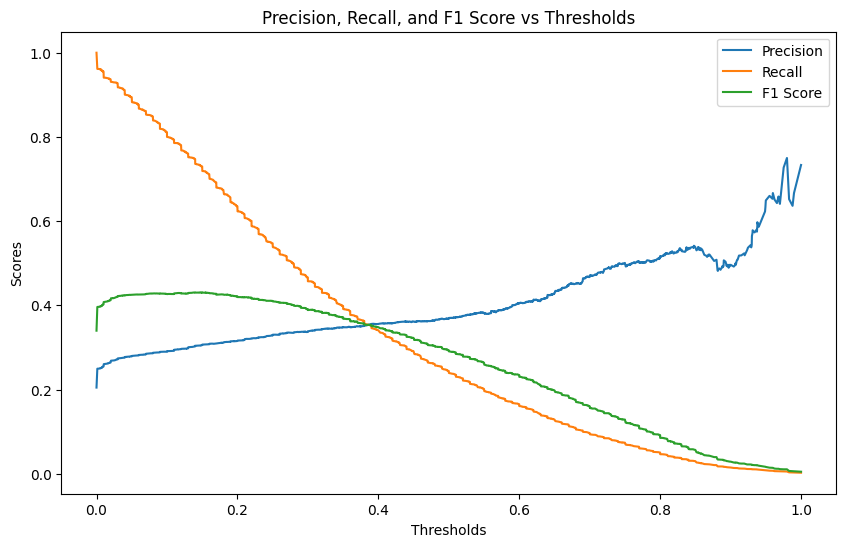

In [ ]:
#Doing Threshold Tuning to try to make the model better
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_rf) #Gets the thresholds
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)

plt.figure(figsize = (10,6))
plt.plot(thresholds, precision[:-1], label = 'Precision' )
plt.plot(thresholds, recall[:-1], label = 'Recall')
plt.plot(thresholds, f1_scores[:-1], label = 'F1 Score')
plt.xlabel('Thresholds')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1 Score vs Thresholds')
plt.legend()
plt.show()

In [ ]:
#Getting optimal f1_scores for rf model
optimal_ind = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_ind]
print(f'Optimal Thresholds for Random Forest Classifier: {optimal_threshold:.2f}')

Optimal Thresholds for Random Forest Classifier: 0.14


In [ ]:
#Applying threshold tuning to random forest model
y_pred_tuned_rf = (y_prob_rf >= 0.14).astype(int)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_tuned_rf))
print('Classification Report:\n',  classification_report(y_test, y_pred_tuned_rf))
print('Accuracy Score:\n', accuracy_score(y_test, y_pred_tuned_rf))
print('AUC:\n', roc_auc_score(y_test, y_prob_rf))

Confusion Matrix:
 [[9779 7801]
 [1142 3382]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.56      0.69     17580
           1       0.30      0.75      0.43      4524

    accuracy                           0.60     22104
   macro avg       0.60      0.65      0.56     22104
weighted avg       0.77      0.60      0.63     22104

Accuracy Score:
 0.5954125950054289
AUC:
 0.7034390720103325


In [ ]:
#Reducing SHAP for plot because it is computationally heavy for RF
#Sampling the test data because SHAP is very computationally expensize
X_test_sample = X_test.sample(n = 1000, random_state = 42)
rf_small = RandomForestClassifier(n_estimators = 100, random_state = 42, class_weight = 'balanced')
rf_small.fit(X_train, y_train)
rf_explainer = shap.TreeExplainer(rf_small, model_output = 'raw')
shap_val_small_rf = rf_explainer.shap_values(X_test_sample)
shap.summary_plot(shap_val_small[1], X_test_sample, plot_type = 'bar') #Shap_vals[1] is for the classification, [1] represents the No_show classification


In [ ]:
#Creating a side-by-side comparison of the different models
log_importance = pd.Series(model.coef_[0], index = X_train.columns)
xgb_importance = pd.Series(xgb_model.feature_importances_, index = X_train.columns)
rf_importance = pd.Series(rf_model.feature_importances_, index = X_train.columns)

model_imprtances = pd.DataFrame({'Log Regression': log_importance.abs(),
                                 'XGBoost':xgb_importance,
                                 'Random Forest': rf_importance})